<a href="https://colab.research.google.com/github/Shaillucky/Time_Series_Analysis-Using-LSTM-and-Classical-Models/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow
np.random.seed(1551)
tensorflow.random.set_seed(1551)


# Importing the Keras libraries and packages
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.layers.core import Activation
from keras import optimizers
# from tensorflow.keras.losses import huber_loss
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [6]:
!kaggle datasets download -d raavisoni/stocks   # Donlading the Data From Kaggle 

  0% 0.00/1.59M [00:00<?, ?B/s]
100% 1.59M/1.59M [00:00<00:00, 67.5MB/s]


In [7]:
!unzip \*.zip  && rm *.zip

Archive:  stocks.zip
  inflating: AC_Air canada.csv       
  inflating: APHA_Aphria Inc..csv    
  inflating: BLDP_Ballard Power Systems Inc..csv  
  inflating: BYD_Boyd Group Services.csv  
  inflating: CSGP_CoStar Group Inc.csv  
  inflating: CSGS_CSG Systems International Inc.csv  
  inflating: CSU_Constellation Software.csv  
  inflating: DOL_Dollarama.csv       
  inflating: ENB_Enbridge.csv        
  inflating: ETFC_ETRADE Financial Corporation.csv  
  inflating: GIB_CGI Inc.csv         
  inflating: GOOS_Canada Goose.csv   
  inflating: GSY_Goeasy Ltd.csv      
  inflating: KL_Kirkland Lake.csv    
  inflating: MFC_Manulife Financial.csv  
  inflating: NEPT_Neptune Wellness Solutions Inc..csv  
  inflating: NOA_North American Construction Group Ltd..csv  
  inflating: OTEX_Opentext.csv       
  inflating: PKI_Parkland Fuels.csv  
  inflating: PLC_Park Lawn Corp.csv  
  inflating: SHOP_Shopify.csv        
  inflating: TD_Toronto-Dominion Bank.csv  
  inflating: TFII_TFI Internati

## **Taking 1st Ten Stocks for this Project**

In [8]:
## Add Stock Name (sample)
df1 = pd.read_csv("AC_Air canada.csv")
df1['Stock name'] = 'AC_Air canada'

### Ballard Power System
df2 = pd.read_csv("BLDP_Ballard Power Systems Inc..csv")
df2['Stock name'] = 'BLDP_Ballard Power Systems Inc.'

## Boyd Services'
df3 = pd.read_csv("BYD_Boyd Group Services.csv")
df3['Stock name'] = 'BYD_Boyd Group Services'

## Trilogy Metals
df4 = pd.read_csv("TMQ_Trilogy Metals Inc.csv")
df4['Stock name'] = 'TMQ_Trilogy Metals Inc'

## CoStar Group
df5 = pd.read_csv("CSGP_CoStar Group Inc.csv")
df5['Stock name'] = 'CSGP_CoStar Group Inc'

## CSGS_CSG Systems International
df6 = pd.read_csv("CSGS_CSG Systems International Inc.csv")
df6['Stock name'] = 'CSGS_CSG Systems International Inc'

## CSU Constellation Software
df7 = pd.read_csv("CSU_Constellation Software.csv")
df7['Stock name'] = 'CSU_Constellation Software'

## Dollarama
df8 = pd.read_csv("DOL_Dollarama.csv")
df8['Stock name'] = 'DOL_Dollarama'

## ENB_Enbridge
df9 = pd.read_csv("ENB_Enbridge.csv")
df9['Stock name'] = 'ENB_Enbridge'

## ETFC 
df10 = pd.read_csv("ETFC_ETRADE Financial Corporation.csv")
df10['Stock name'] = 'ETFC_ETRADE Financial Corporation'


In [9]:
df1.head(2)

,date,volume,open,high,low,close,adjclose,Stock name
0,2020-07-02,8700,36.349998,36.349998,35.910000,36.119999,36.119999,AC_Air canada
1,2020-07-01,12000,37.369999,37.549999,35.459999,35.459999,35.459999,AC_Air canada


In [10]:
def preprocessing(df):
    df['open'] = pd.to_numeric(df['open'])
    df['high'] = pd.to_numeric(df['high'])
    df['low'] = pd.to_numeric(df['low'])
    df['close'] = pd.to_numeric(df['close'])
    
    df = df.drop(['Stock name'], axis = 1)
    
    df = df.set_index('date')[ '2020-04-30':'2016-01-01']
    df = df.reset_index()
    
    df = df.sort_values('date')
    np.random.seed(1551)
    tensorflow.random.set_seed(1551)
    
    len_df = int(len(df)*0.7)
    train_df = df[0: len_df]
    test_df = df[len_df:]
    
    train_df = train_df.drop(['adjclose', 'volume'], axis = 1)
    test_df = test_df.drop(['adjclose', 'volume'], axis =1)
    
    ## Training 
    y_train = train_df['open'] ## Targets
    date_train = train_df.iloc[:,0] ## Date
    x_train = train_df.iloc[:, 2:5] ## Data
    
    ## Testing
    y_valid = test_df['open'] 
    date_valid = test_df.iloc[:,0]
    x_valid = test_df.iloc[:, 2:5]
    
    return x_train, y_train, x_valid, y_valid, date_train, date_valid   

In [11]:
def graph1(date_train, y_train, date_valid, y_valid):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(figsize = (8,3))
    ax.plot(date_train, y_train, color = 'red', marker='', linewidth='0.75')
    ax.plot(date_valid, y_valid, color = 'blue', marker='', linewidth='0.75')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.legend(['Training Data', 'Testing Data'], loc='upper left')
    ax.set(xlabel="Date",
           ylabel="Open Price",
           title="Stock Prices");
    plt.show()

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6189 entries, 0 to 6188
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        6189 non-null   object 
 1   volume      6189 non-null   int64  
 2   open        6189 non-null   float64
 3   high        6189 non-null   float64
 4   low         6189 non-null   float64
 5   close       6189 non-null   float64
 6   adjclose    6189 non-null   float64
 7   Stock name  6189 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 386.9+ KB


In [12]:
df2.head(2)

,date,volume,open,high,low,close,adjclose,Stock name
0,2020-06-19,2360400,13.83,13.99,13.39,13.44,13.44,BLDP_Ballard Power Systems Inc.
1,2020-06-18,1972400,13.18,14.02,13.15,14.00,14.00,BLDP_Ballard Power Systems Inc.


# **ANN's (MLP vs Single layer Perceptron)**

STOCK NAME:  AC_Air canada
Epoch 1/10
39/39 [==============================] - 1s 6ms/step - loss: 0.2232
Epoch 2/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 3/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 5/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 8/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 9/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.3186
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 3/10
39/39 [======

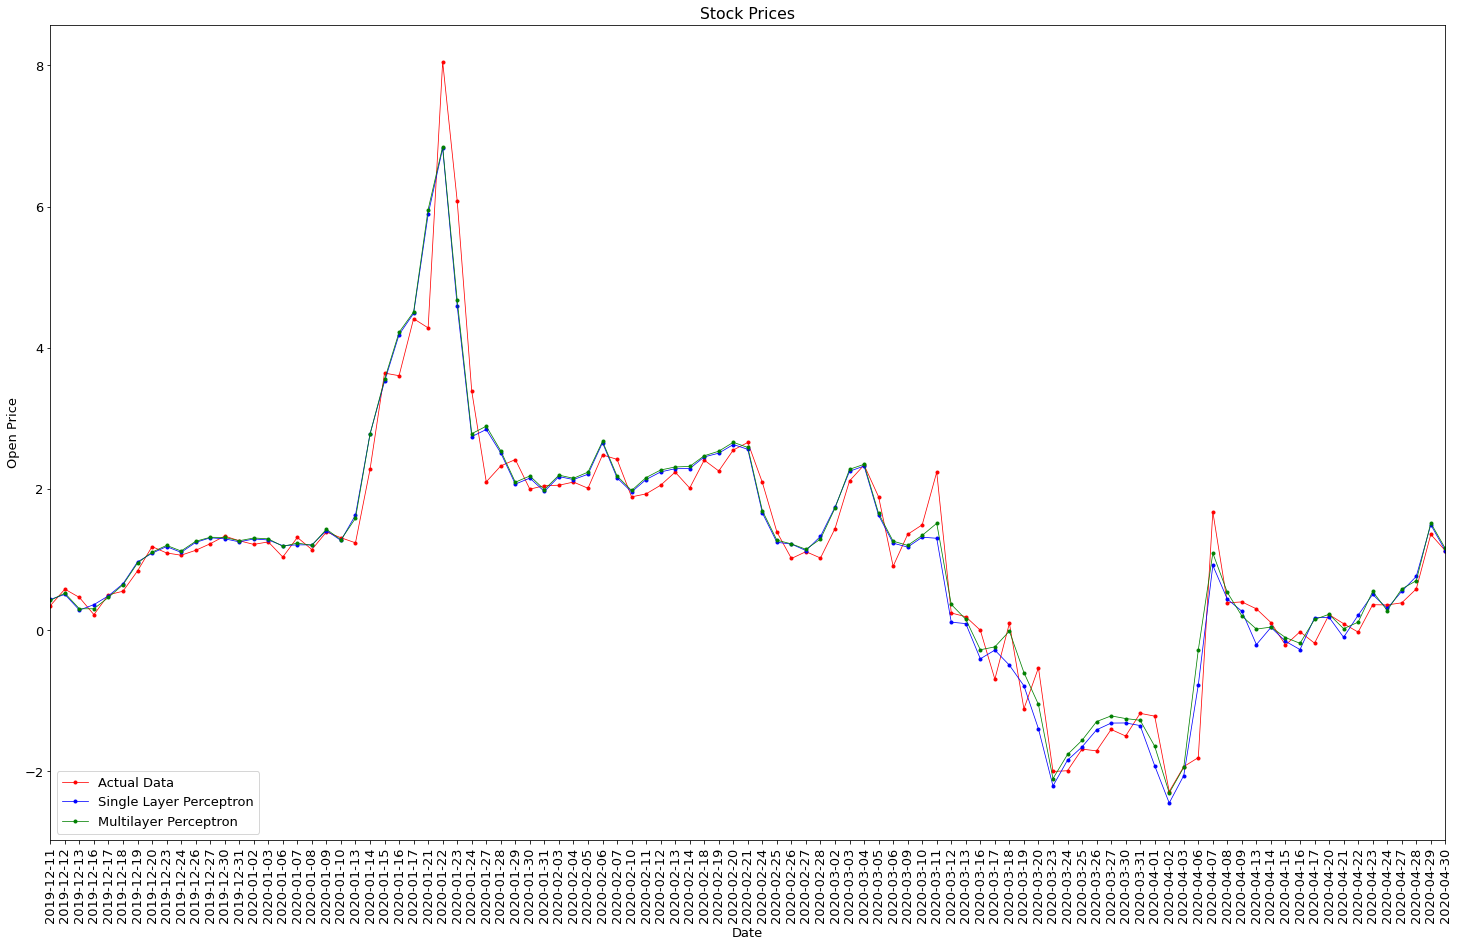

STOCK NAME:  BLDP_Ballard Power Systems Inc.
Epoch 1/10
39/39 [==============================] - 1s 5ms/step - loss: 0.2258
Epoch 2/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 8/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.3238
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 

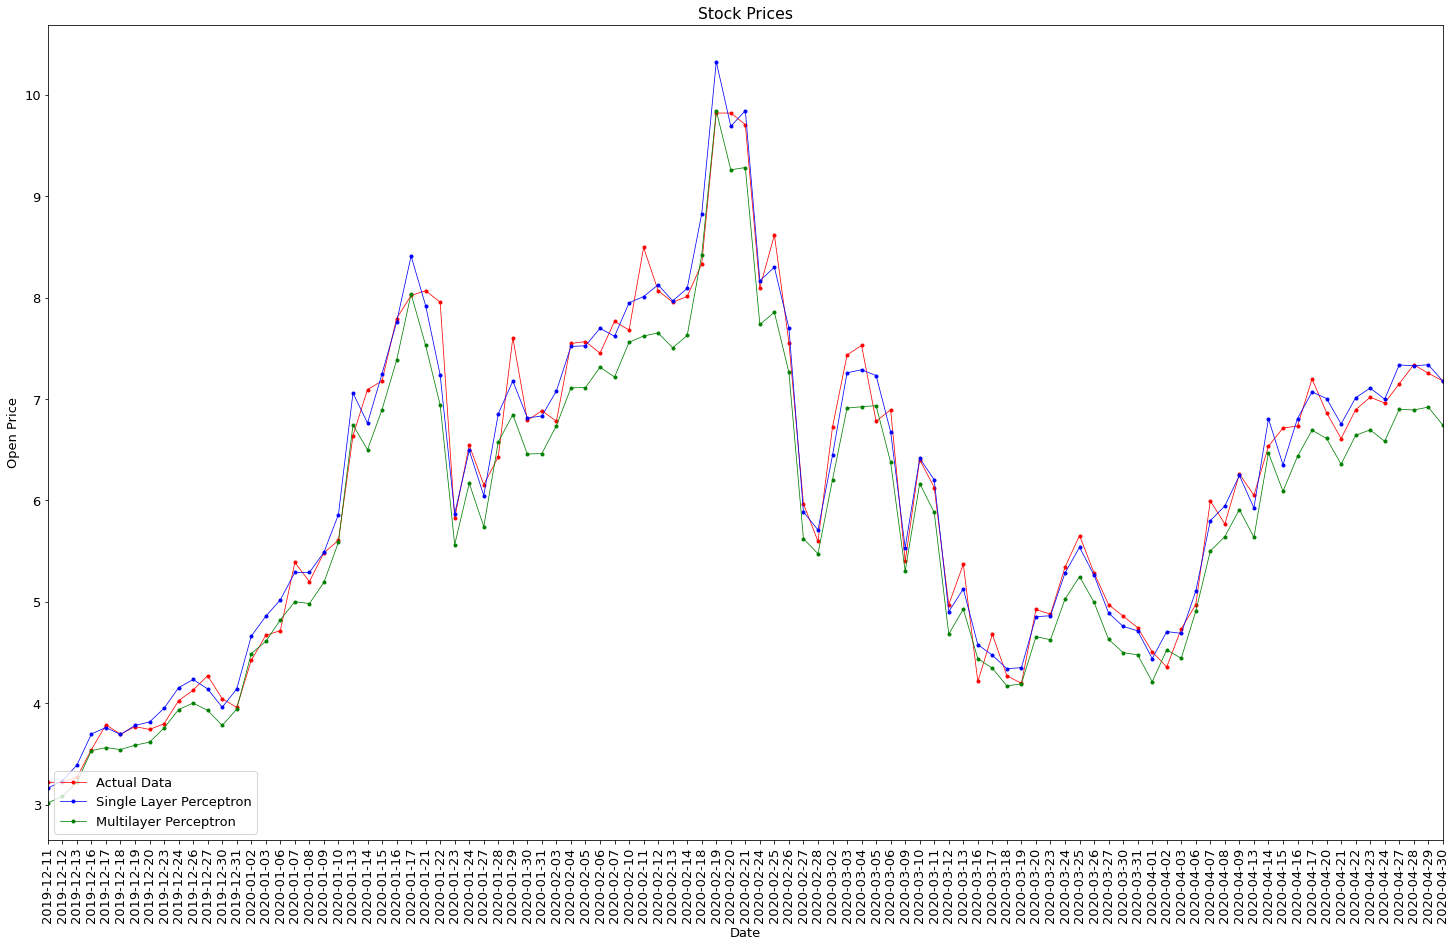

STOCK NAME:  BYD_Boyd Group Services
Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.2214
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 3/10
39/

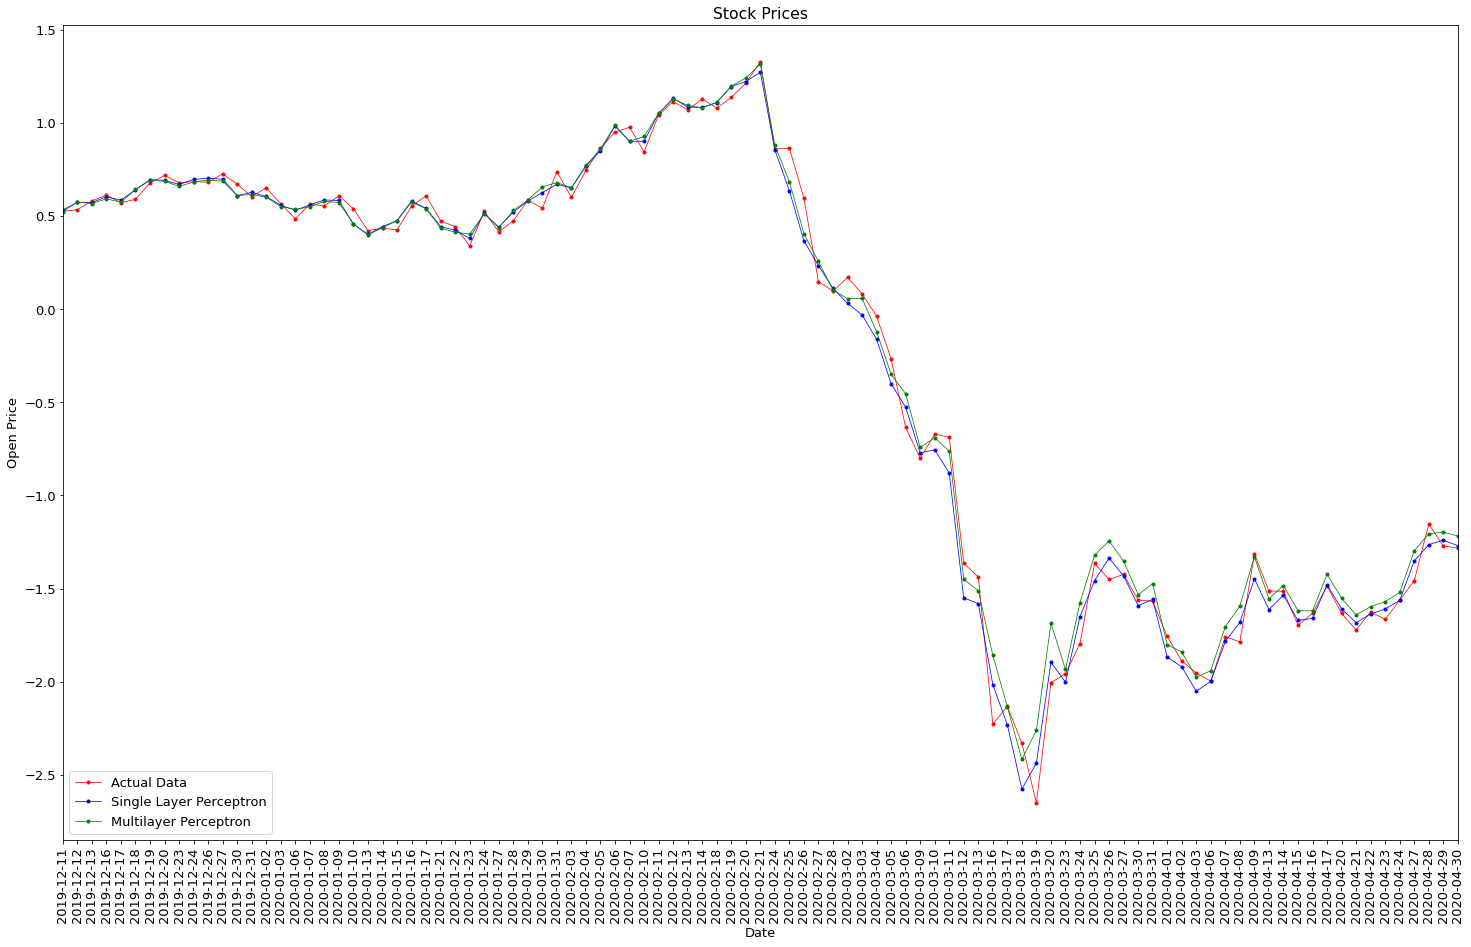

STOCK NAME:  TMQ_Trilogy Metals Inc
Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.2044
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3019
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 3/10
39/3

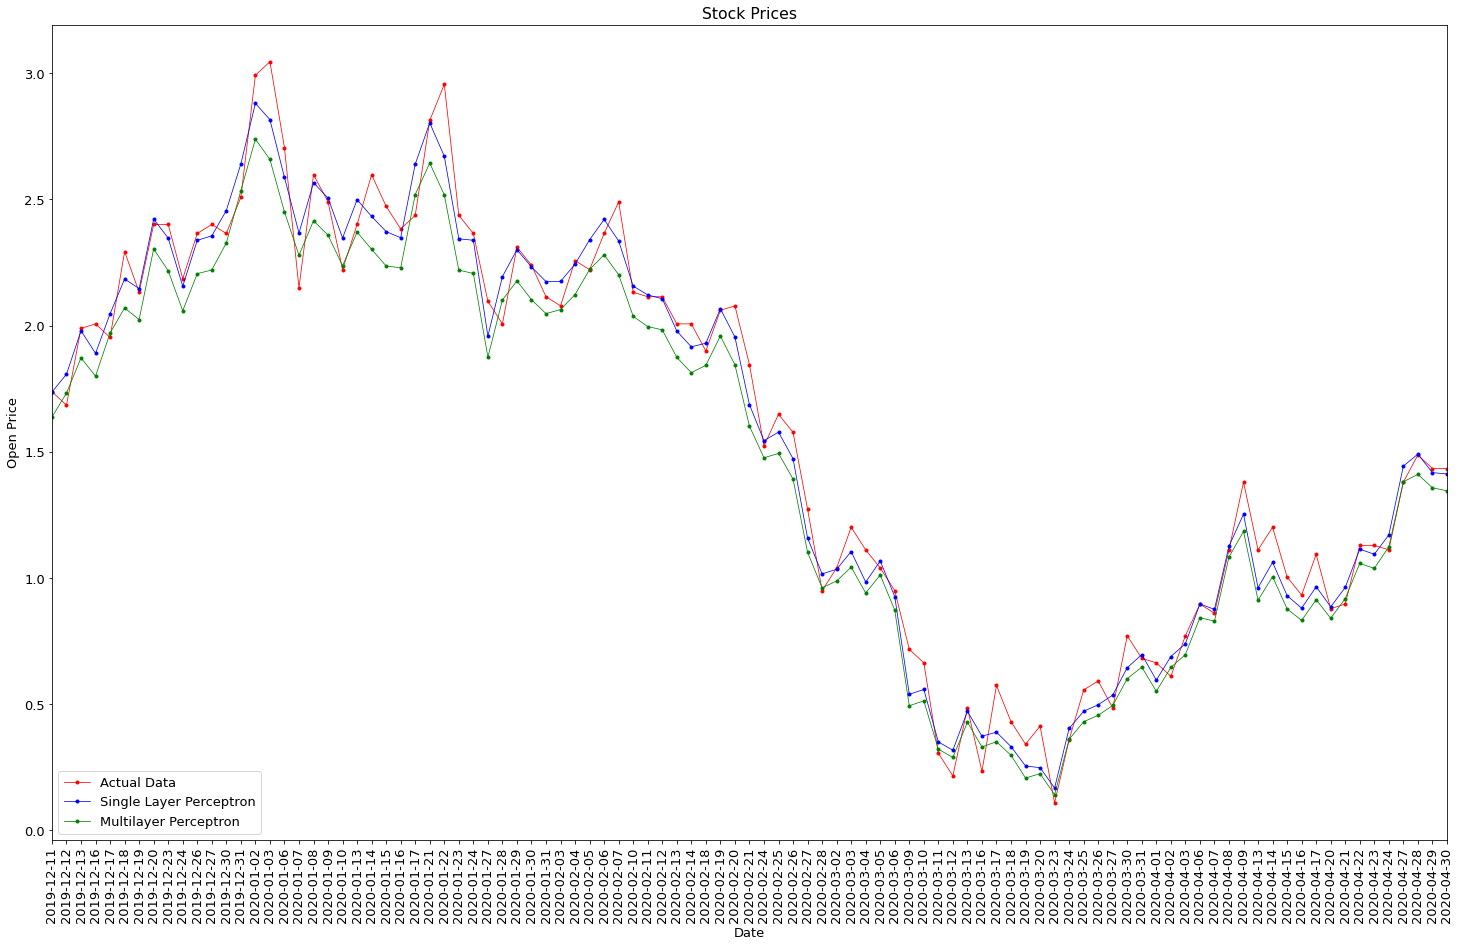

STOCK NAME:  CSGP_CoStar Group Inc
Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.2268
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3265
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 3/10
39/39

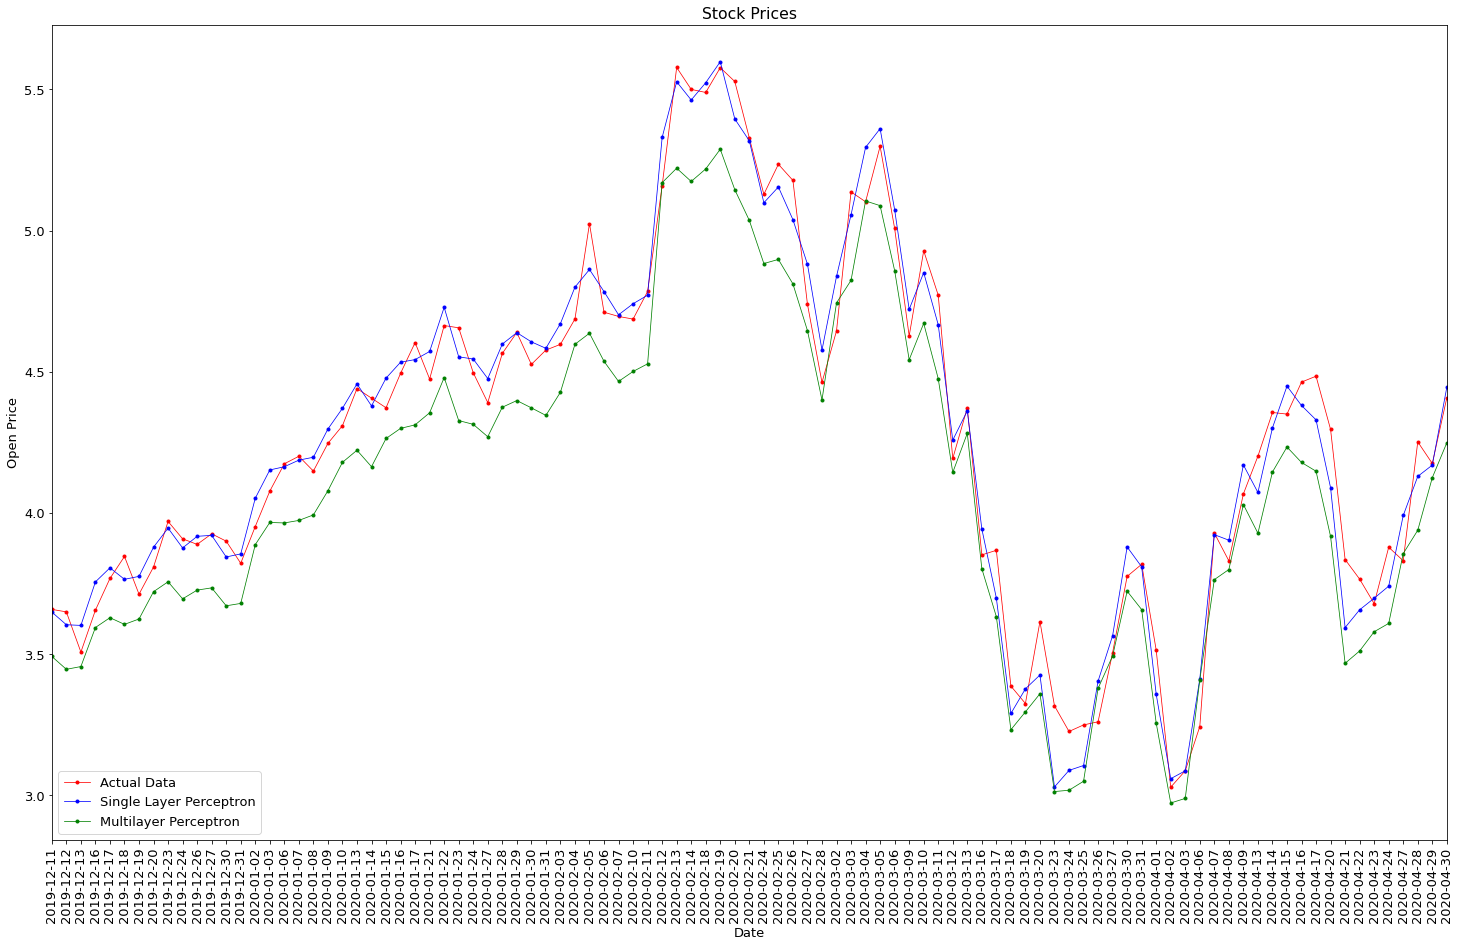

STOCK NAME:  CSGS_CSG Systems International Inc
Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.2250
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0120
Epo

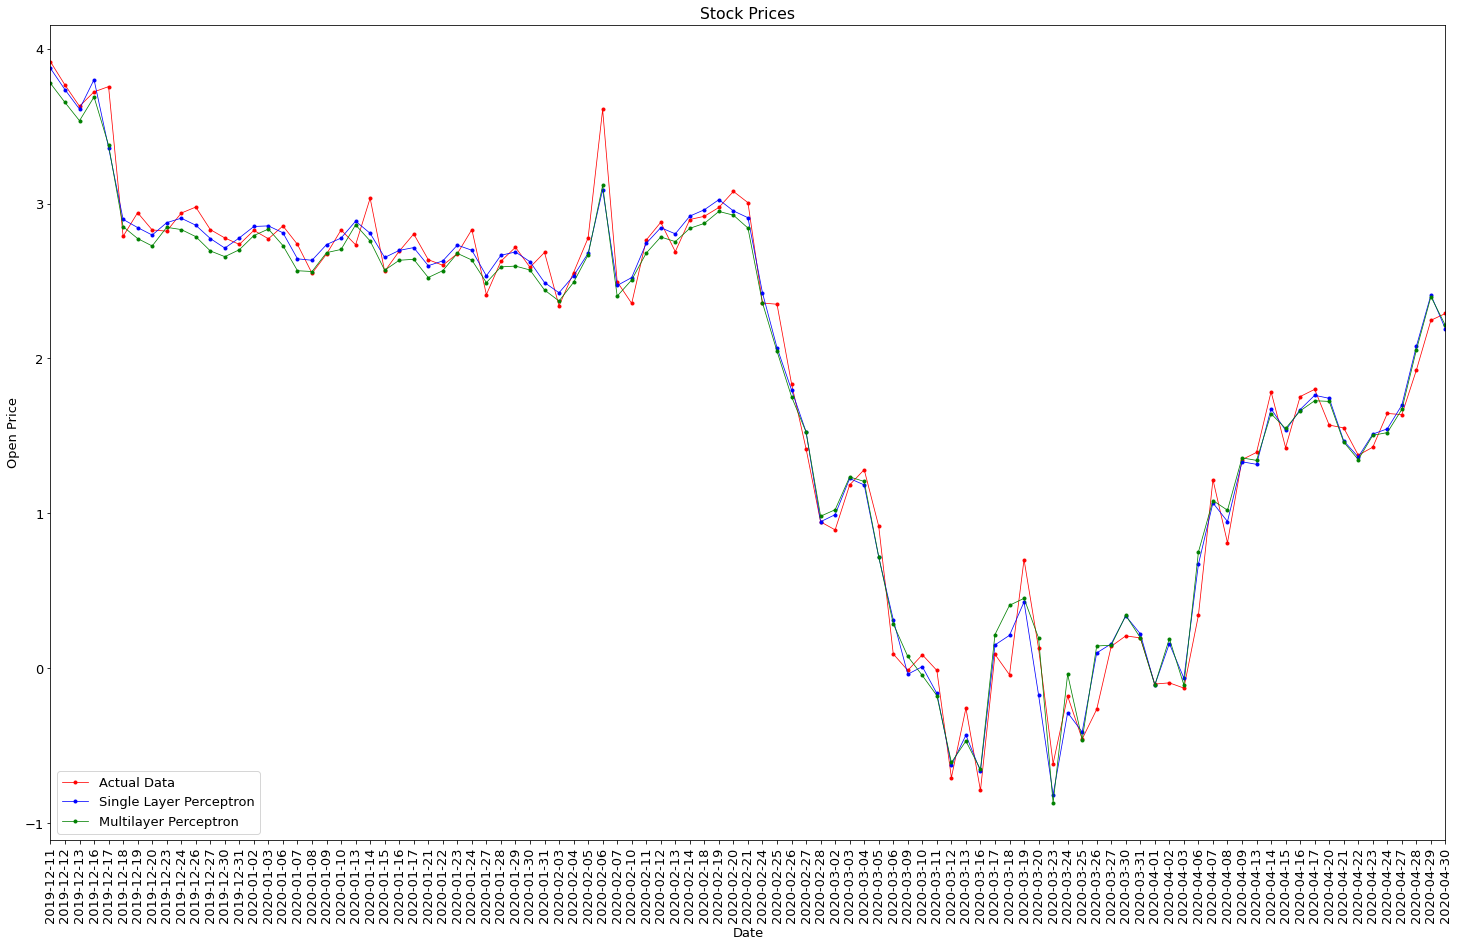

STOCK NAME:  CSU_Constellation Software
Epoch 1/10
39/39 [==============================] - 1s 3ms/step - loss: 0.2188
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3170
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 3/10


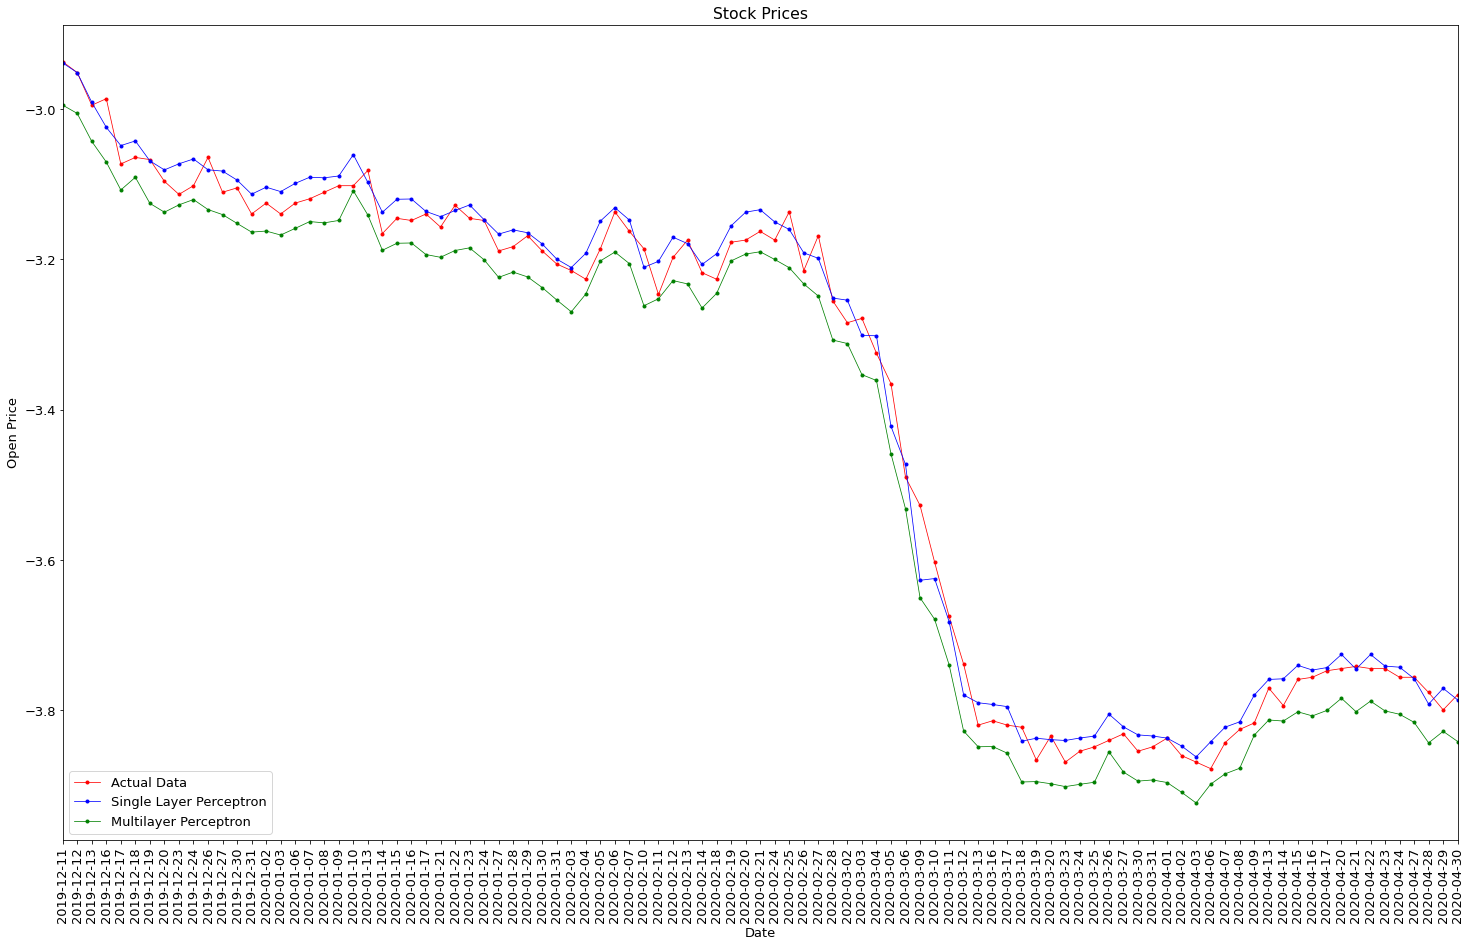

STOCK NAME:  DOL_Dollarama
Epoch 1/10
39/39 [==============================] - 1s 3ms/step - loss: 0.2210
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3249
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 3/10
39/39 [======

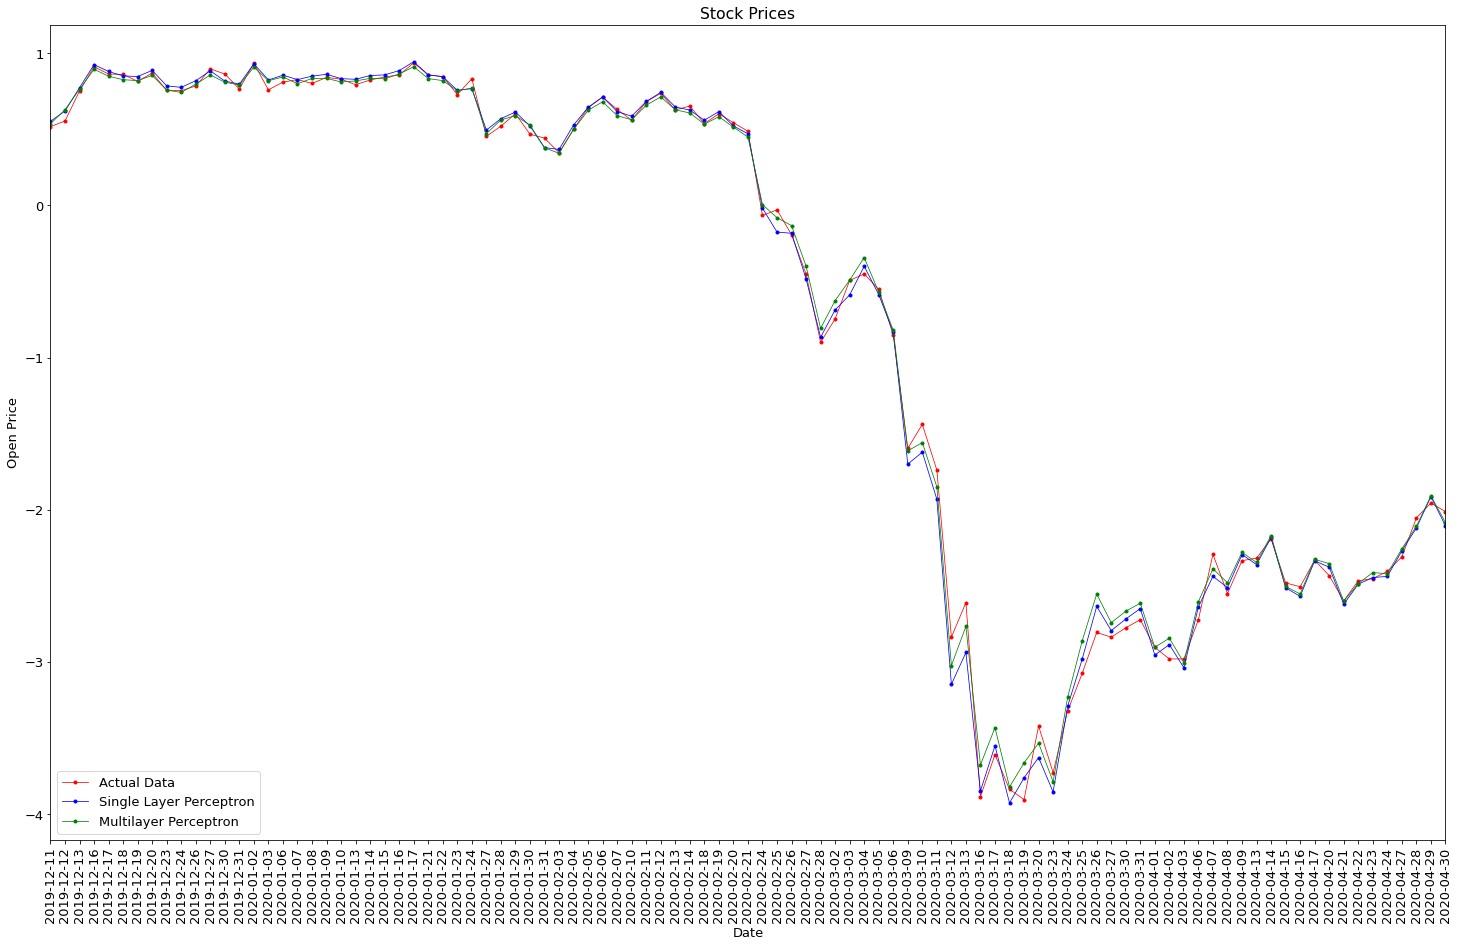

STOCK NAME:  ENB_Enbridge
Epoch 1/10
39/39 [==============================] - 1s 3ms/step - loss: 0.2046
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 10/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 3/10
39/39 [=======

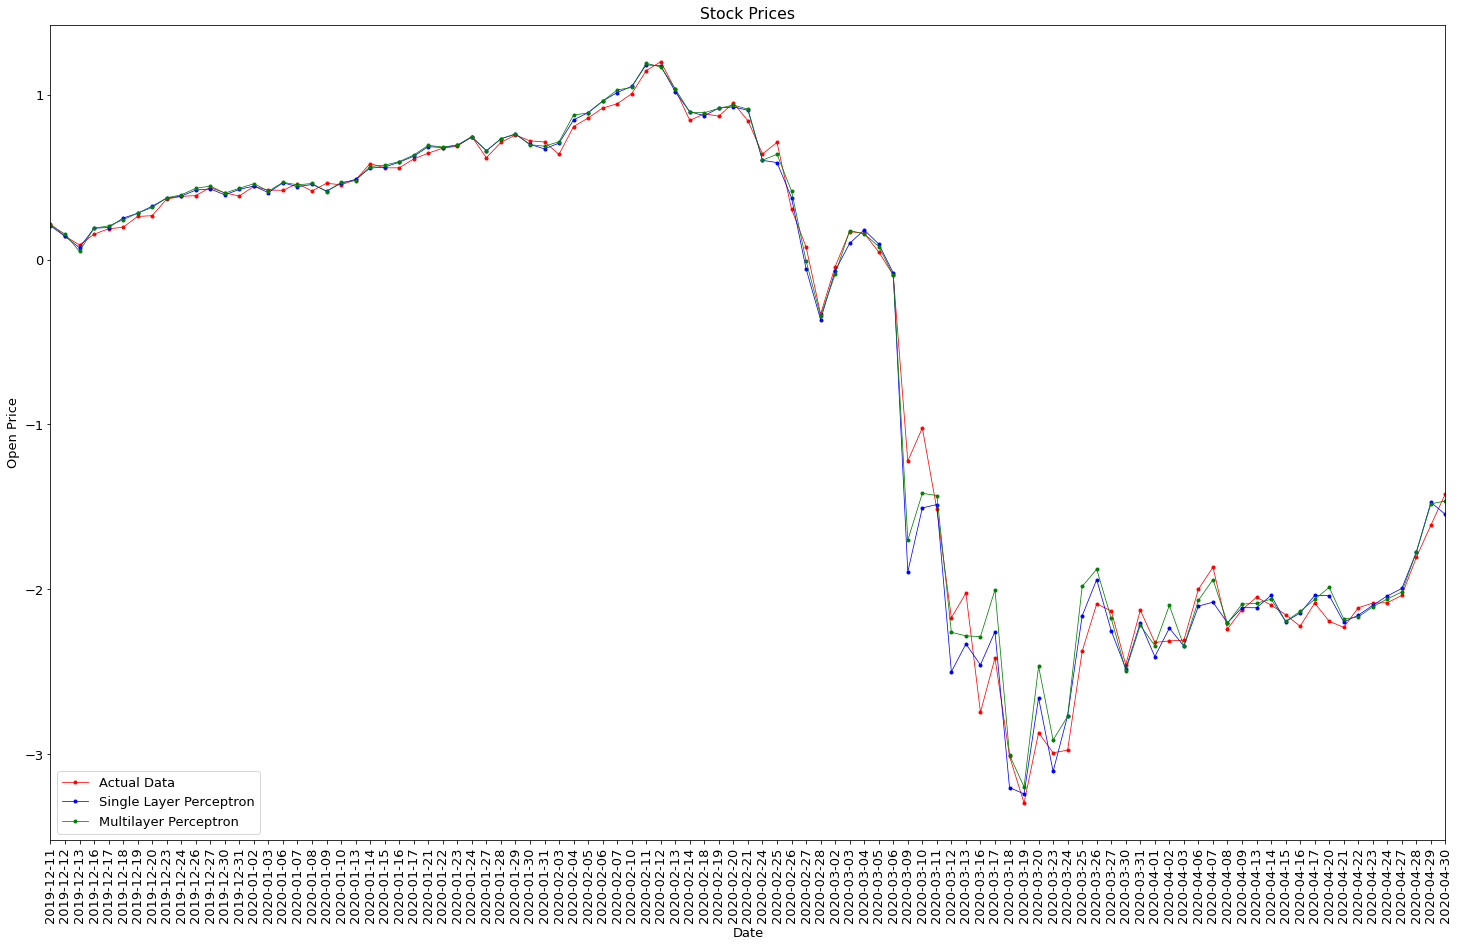

STOCK NAME:  ETFC_ETRADE Financial Corporation
Epoch 1/10
39/39 [==============================] - 1s 3ms/step - loss: 0.2294
Epoch 2/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 10/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoc

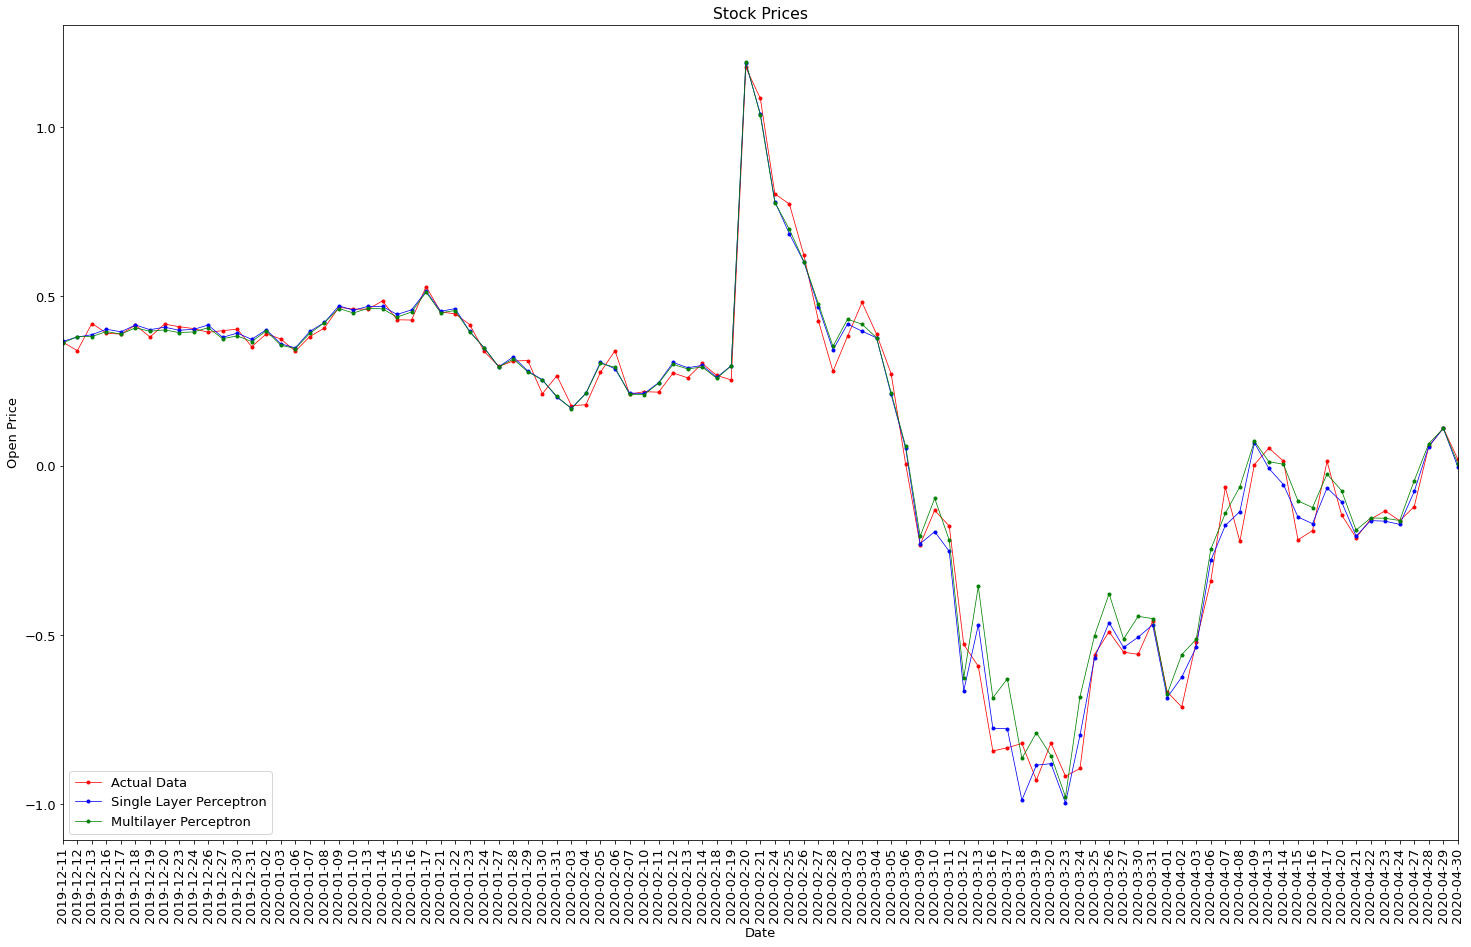

In [14]:
all_df = [df1, df2, df3, df4, df5 ,df6, df7, df8, df9, df10]
ANN_MSE = []
SLP_MSE = []

for df in all_df:
    print("STOCK NAME: ", df['Stock name'][0])
    x_train, y_train, x_valid, y_valid, date_train, date_valid = preprocessing(df)
    
    ## Standard Scaler
    data_scaler = StandardScaler()
    s_train = data_scaler.fit_transform(np.asarray(x_train))
    s_valid = data_scaler.transform(np.asarray(x_valid))
    
    target_scaler = StandardScaler()
    s_label_train = target_scaler.fit_transform(np.asarray(y_train).reshape(-1,1))
    s_label_valid = target_scaler.transform(np.asarray(y_valid).reshape(-1,1))
    
    ## MLP
    ann = Sequential()
    ann.add(Dense(20, activation = 'relu', input_dim = 3))
    ann.add(Dense(units = 75, activation = 'relu'))
    ann.add(Dense(units = 75, activation = 'relu'))
    ann.add(Dense(units = 75, activation = 'relu'))
    ann.add(Dense(units = 1))
    ann.compile(optimizer = 'adam',loss = 'mean_squared_error')
    ann.fit(s_train, s_label_train, batch_size = 20, epochs = 10)
    pred_ann = ann.predict(s_valid)
    ann_mse = mean_squared_error(s_label_valid, pred_ann)
    ANN_MSE.append(ann_mse)
    
    ## Single Layer Perceptron
    slp = Sequential()
    slp.add(Dense(32, input_dim = 3))
    slp.add(Dense(units = 1))
    slp.compile(optimizer = 'adam',loss = 'mse')
    slp.fit(s_train, s_label_train, batch_size =20, epochs = 10)
    pred_slp = slp.predict(s_valid)
    slp_mse = mean_squared_error(s_label_valid, pred_slp)
    SLP_MSE.append(slp_mse)
    
    ## Plot
    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(figsize = (25,15))
    ax.plot(date_valid[230:350], s_label_valid[230:350], color = 'red', marker='.', linewidth='0.75')
    ax.plot(date_valid[230:350], pred_slp[230:350], color = 'blue', marker='.', linewidth='0.75')
    ax.plot(date_valid[230:350], pred_ann[230:350], color = 'green', marker='.', linewidth='0.75')
    plt.xticks(rotation='90')
    plt.gca().margins(x=0)
    plt.legend(['Actual Data', 'Single Layer Perceptron', 'Multilayer Perceptron'], loc='lower left')
    ax.set(xlabel="Date", ylabel="Open Price", title="Stock Prices");
    plt.show()

# **Classical Methods**

STOCK NAME:  AC_Air canada
KNN MSE:  2.8533257360755377


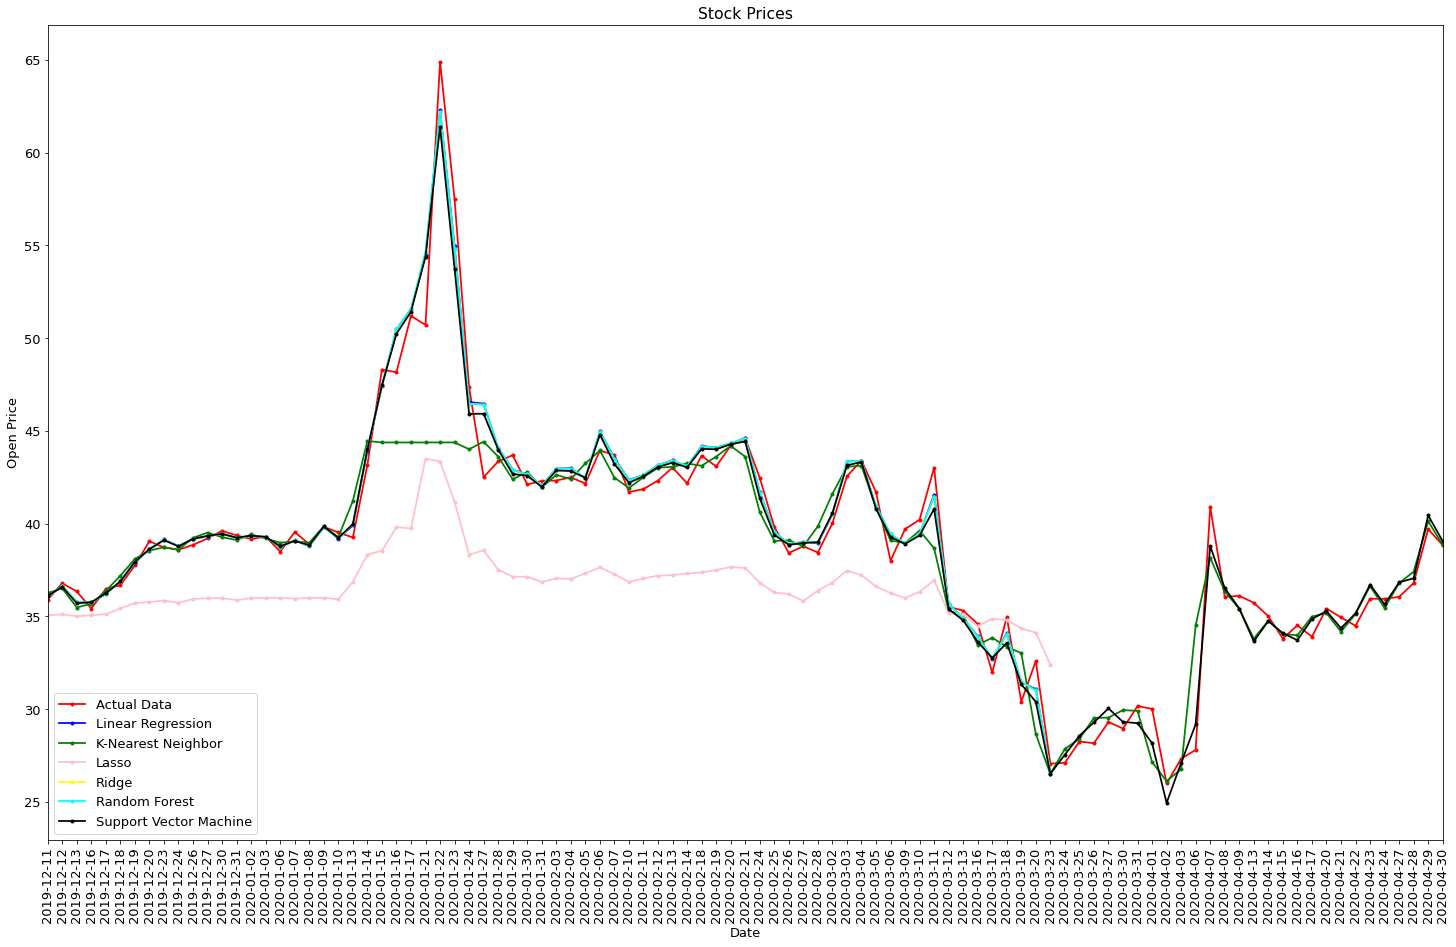

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755]
KNN MSE:
 [2.8533257360755377]
Lasso MSE:
 [15.493929862469383]
Ridge MSE:
 [0.42466844159930756]
Random Forest MSE:
 [2.3902478927860313]
SVM MSE:
 [0.47145577565992564]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  BLDP_Ballard Power Systems Inc.
KNN MSE:  5.130390976645845


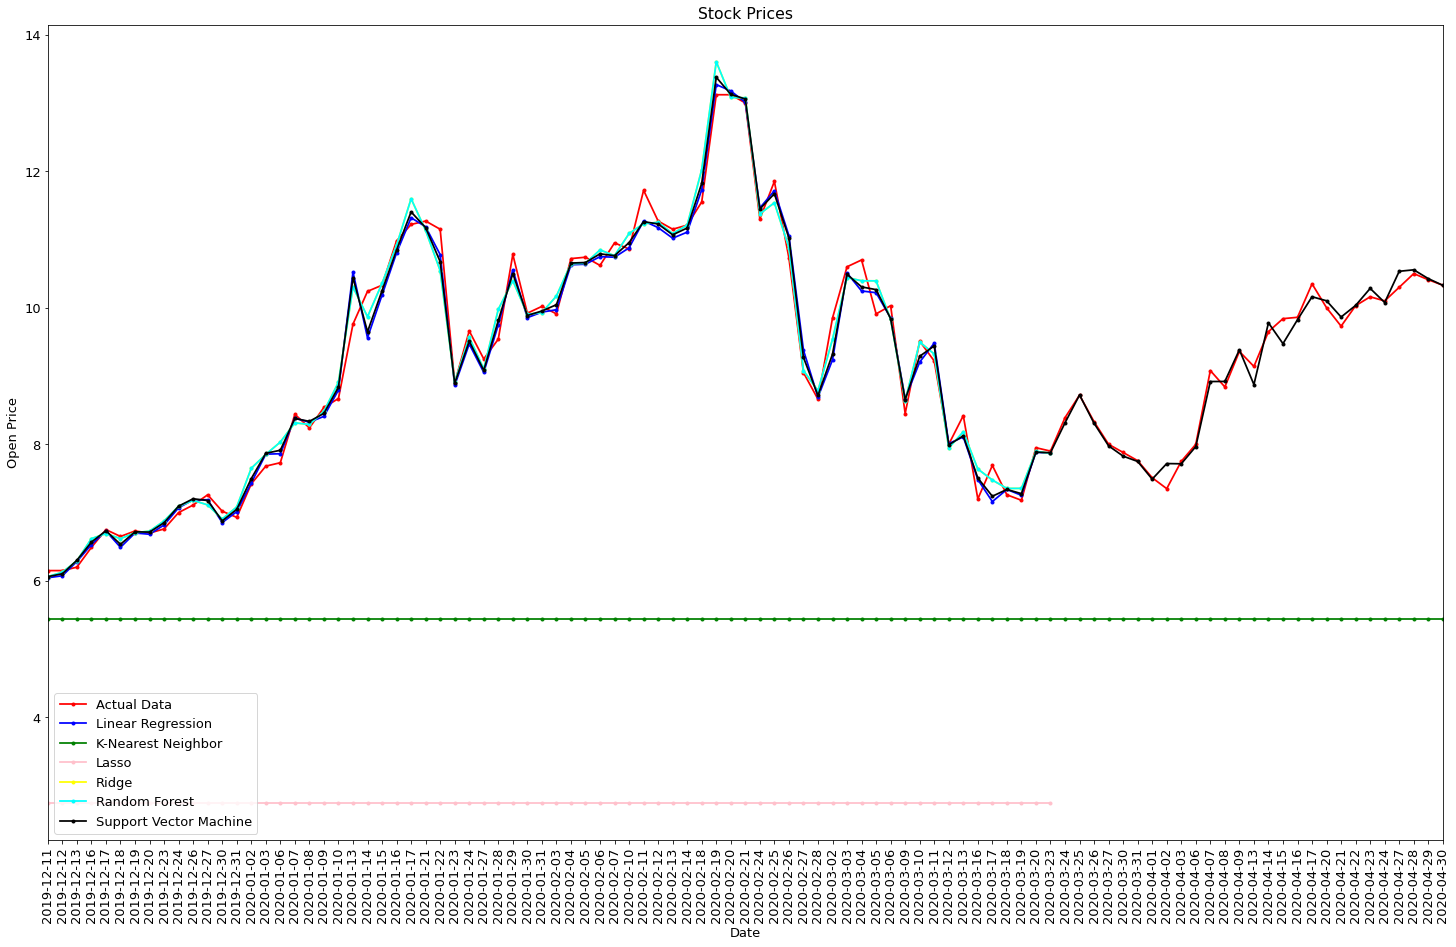

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698]
KNN MSE:
 [2.8533257360755377, 5.130390976645845]
Lasso MSE:
 [15.493929862469383, 15.670372658663553]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182]
SVM MSE:
 [0.47145577565992564, 0.015224220196293626]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  BYD_Boyd Group Services
KNN MSE:  0.9554228122123015


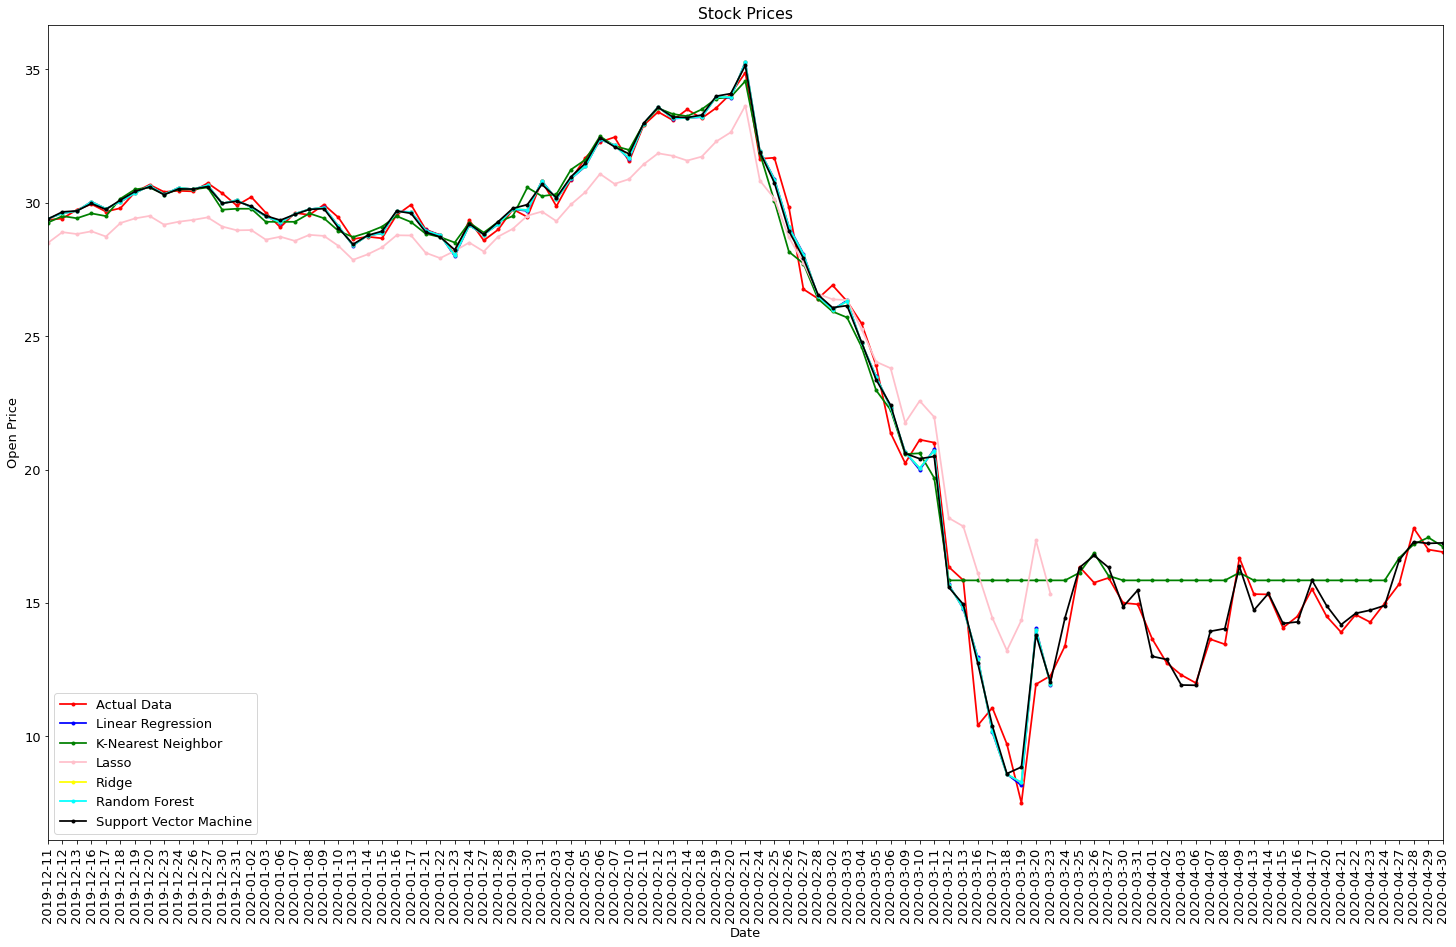

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624]
SVM MSE:
 [0.47145577565992564, 0.015224220196293626, 0.1266565497690703]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  TMQ_Trilogy Metals Inc
KNN MSE:  0.07069309866221501


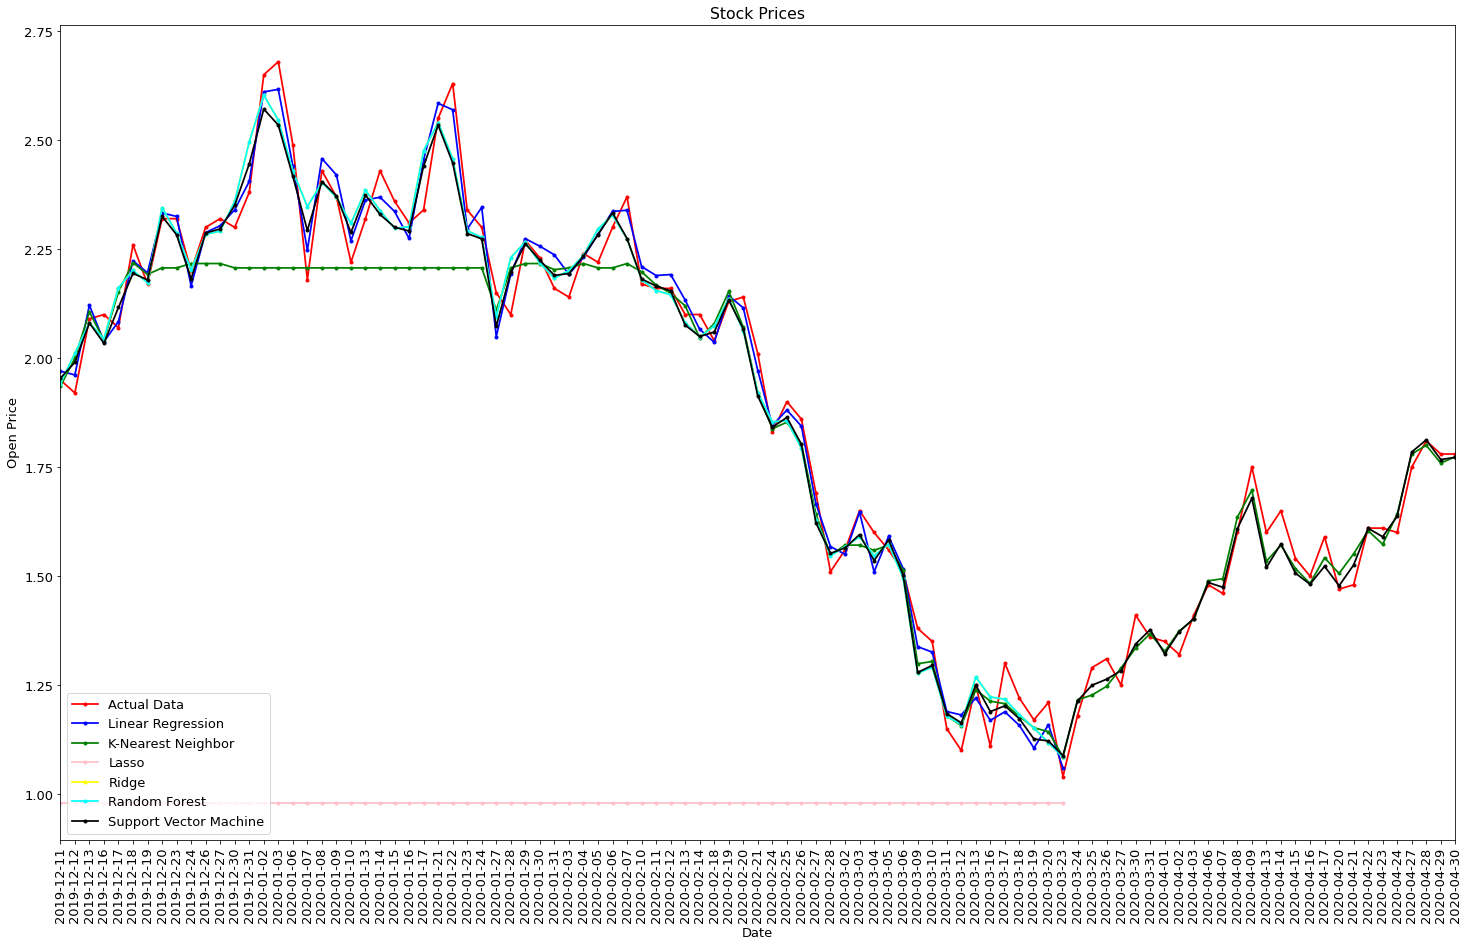

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606, 0.0018728791811405043]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015, 0.07069309866221501]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137, 1.4781068267559903]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049, 0.003021635874409056]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624, 0.05793075750272759]
SVM MSE:
 [0.47145577565992564, 0.015224220196293626, 0.1266565497690703, 0.002920748187002193]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  CSGP_CoStar Group Inc
KNN MSE:  20875.23590359247


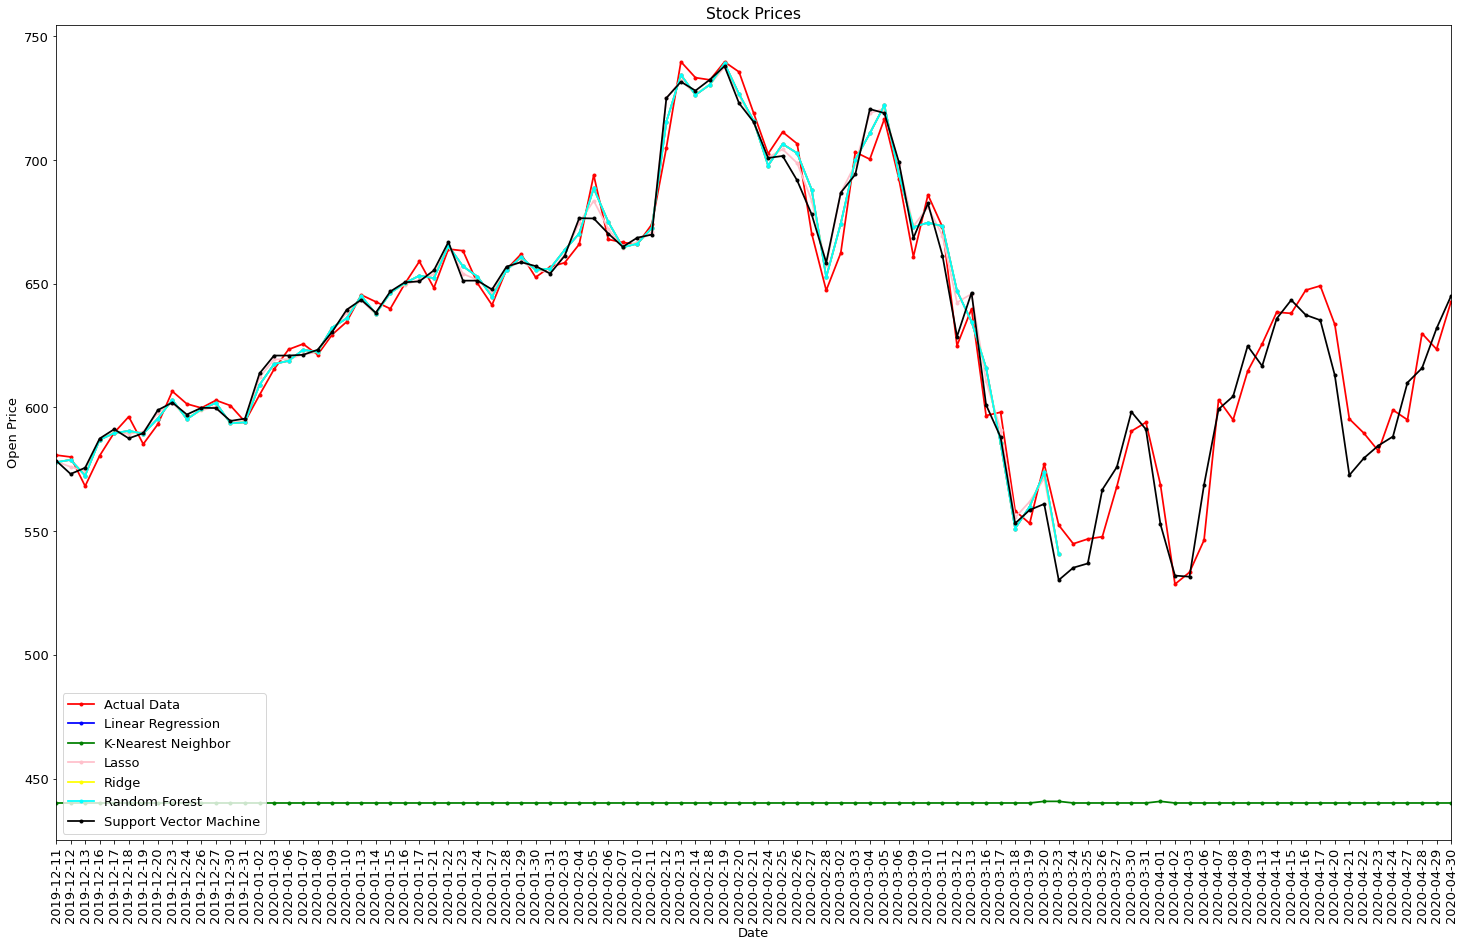

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606, 0.0018728791811405043, 24.769430546845232]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015, 0.07069309866221501, 20875.23590359247]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137, 1.4781068267559903, 35.07868681214803]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049, 0.003021635874409056, 24.771643710397193]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624, 0.05793075750272759, 20508.497347751647]
SVM MSE:
 [0.47145577565992564, 0.015224220196293626, 0.1266565497690703, 0.002920748187002193, 45.733106947028496]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  CSGS_CSG Systems International Inc
KNN MSE:  5.982144777286913


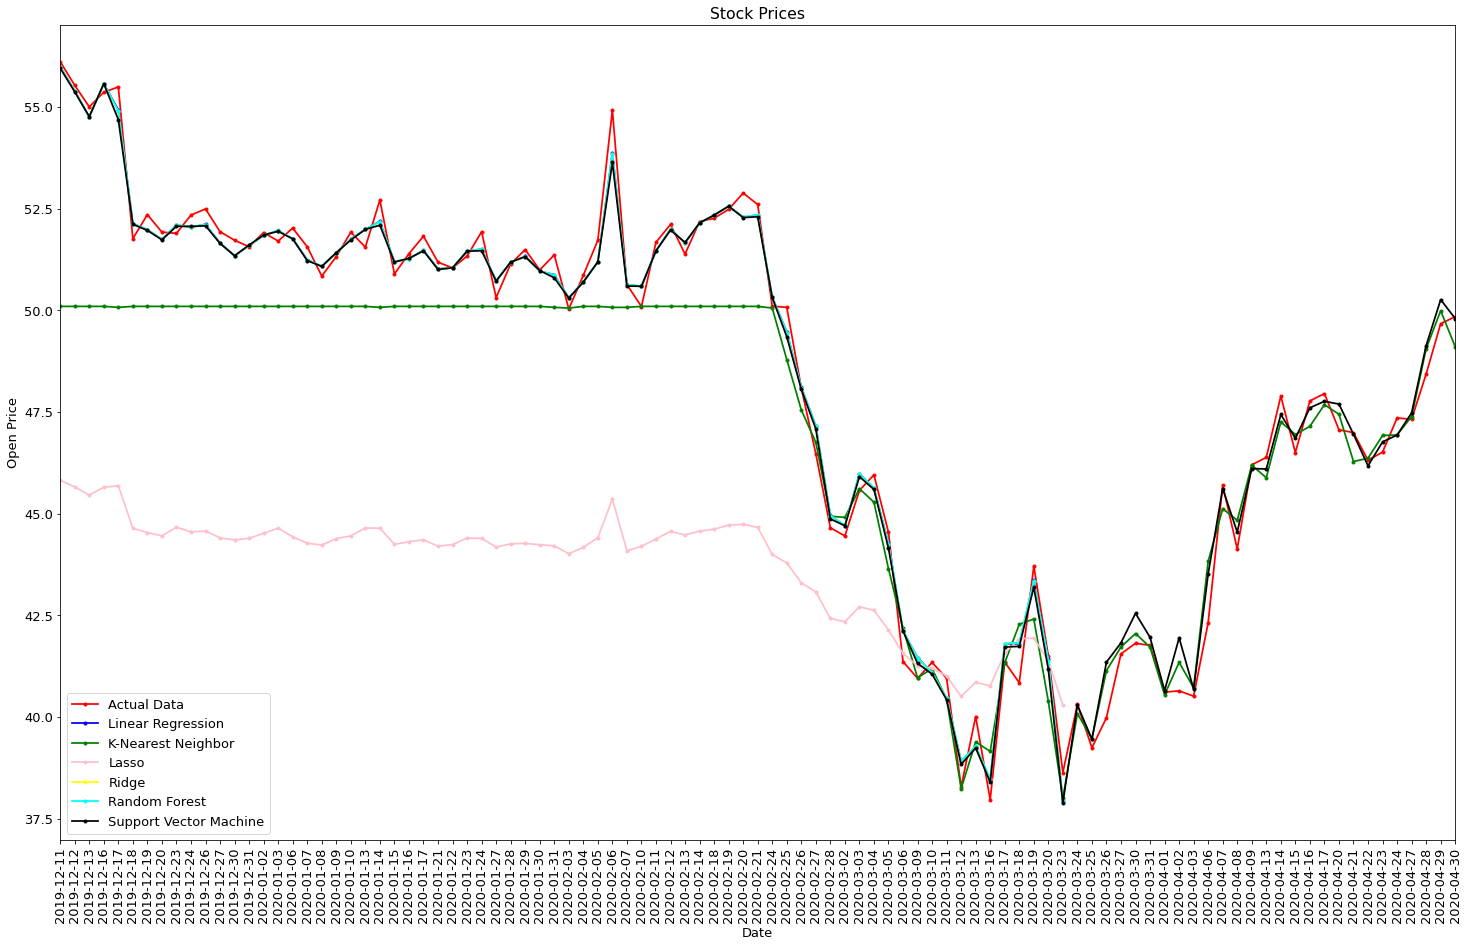

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606, 0.0018728791811405043, 24.769430546845232, 0.21206370668876565]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015, 0.07069309866221501, 20875.23590359247, 5.982144777286913]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137, 1.4781068267559903, 35.07868681214803, 35.92465254876913]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049, 0.003021635874409056, 24.771643710397193, 0.21313025399877442]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624, 0.05793075750272759, 20508.497347751647, 5.84214526801505]
SVM MSE:
 [0.47145577565992564, 0.015224220196293626, 0.1266565497690703, 0.002920748187002193, 45.733106947028496, 0.21850659799362]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  CSU_Constellation Software
KNN MSE:  10.759084868082155


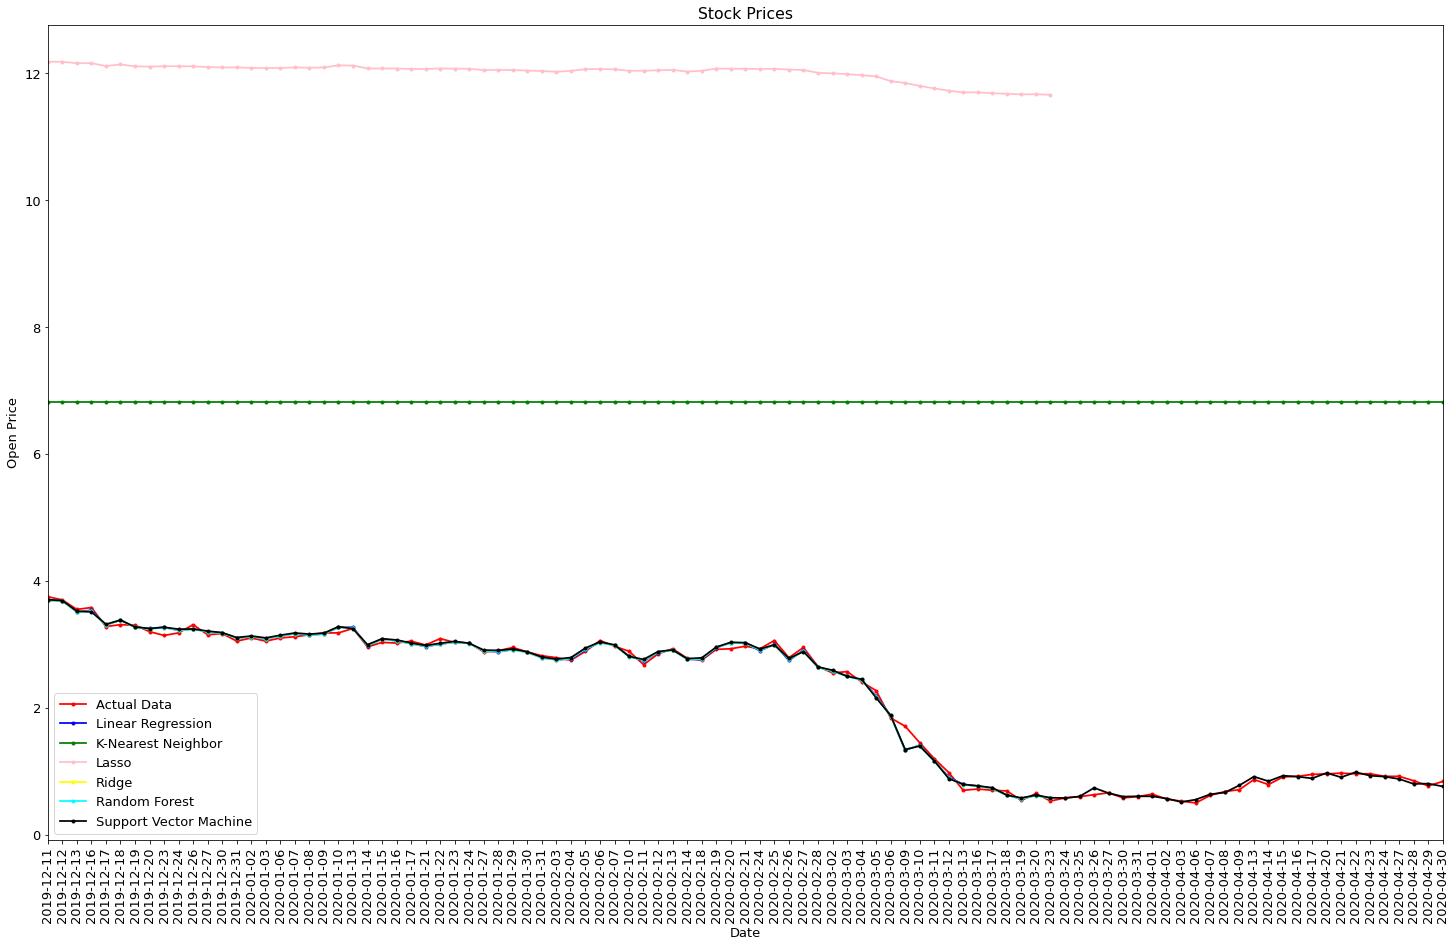

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606, 0.0018728791811405043, 24.769430546845232, 0.21206370668876565, 0.005575342056804733]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015, 0.07069309866221501, 20875.23590359247, 5.982144777286913, 10.759084868082155]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137, 1.4781068267559903, 35.07868681214803, 35.92465254876913, 70.5240930126532]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049, 0.003021635874409056, 24.771643710397193, 0.21313025399877442, 0.005859557693413025]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624, 0.05793075750272759, 20508.497347751647, 5.84214526801505, 10.090853434401394]
SVM MSE:
 [0.47145577565992564, 0.015224220196293626, 0.1266565497690703, 0.002920748187002193, 45.733106947028496, 0.21850659799362, 0.006184604819606389]
++++++++++++++++++++END++++++++++

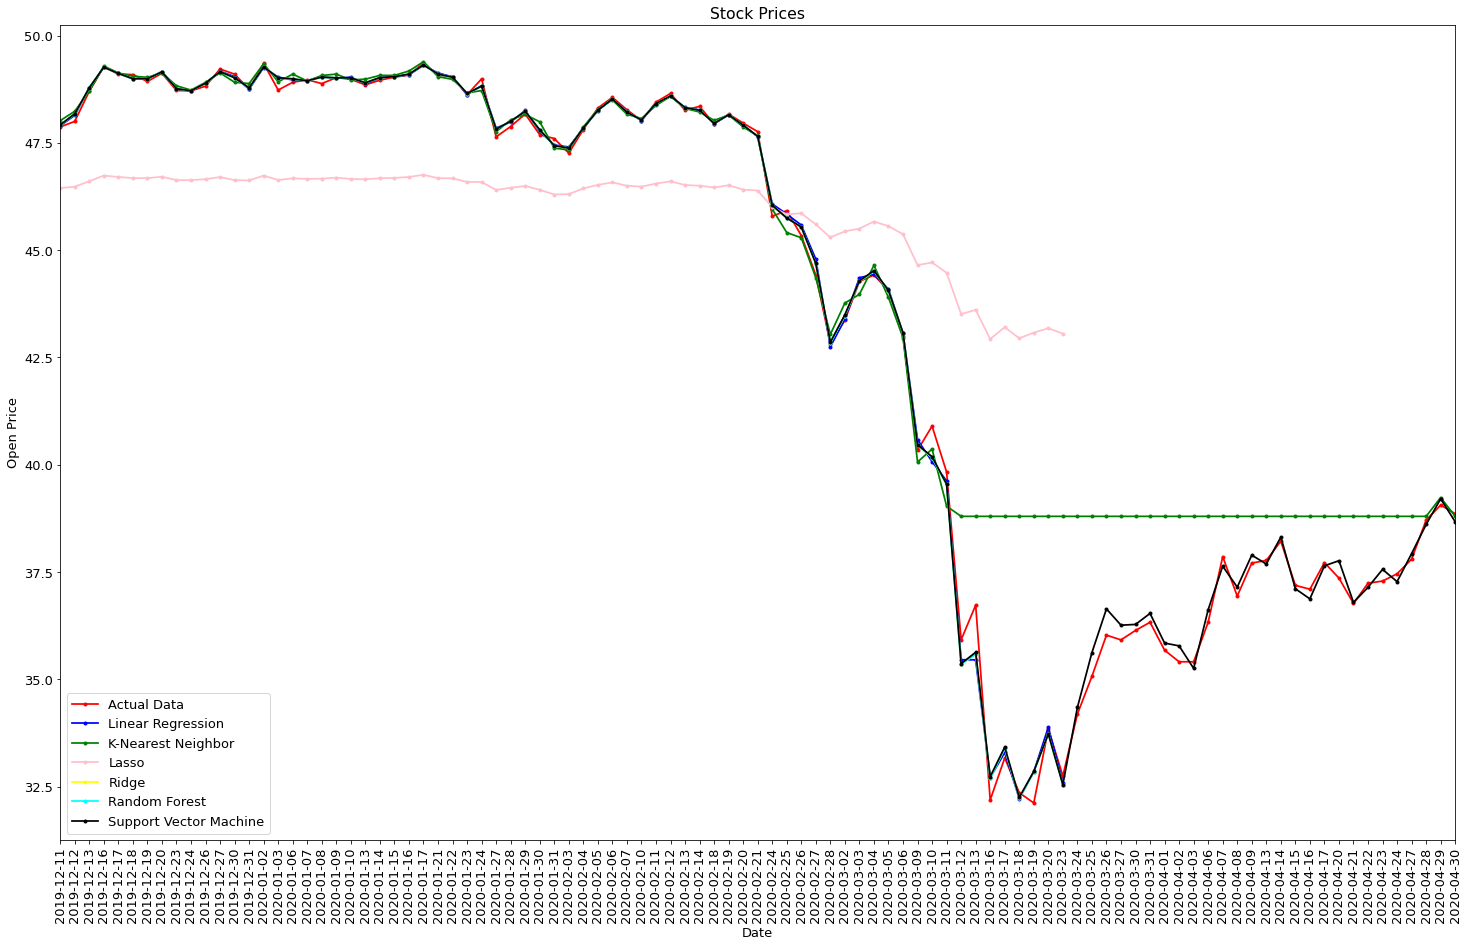

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606, 0.0018728791811405043, 24.769430546845232, 0.21206370668876565, 0.005575342056804733, 0.02243858377339399]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015, 0.07069309866221501, 20875.23590359247, 5.982144777286913, 10.759084868082155, 1.1347456004178615]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137, 1.4781068267559903, 35.07868681214803, 35.92465254876913, 70.5240930126532, 7.97067852780275]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049, 0.003021635874409056, 24.771643710397193, 0.21313025399877442, 0.005859557693413025, 0.02177578336689817]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624, 0.05793075750272759, 20508.497347751647, 5.84214526801505, 10.090853434401394, 0.9233397449841959]
SVM MSE:
 [0.47145577565992564, 0.015224220196293626, 0.1266565497690703, 0.0029207481870

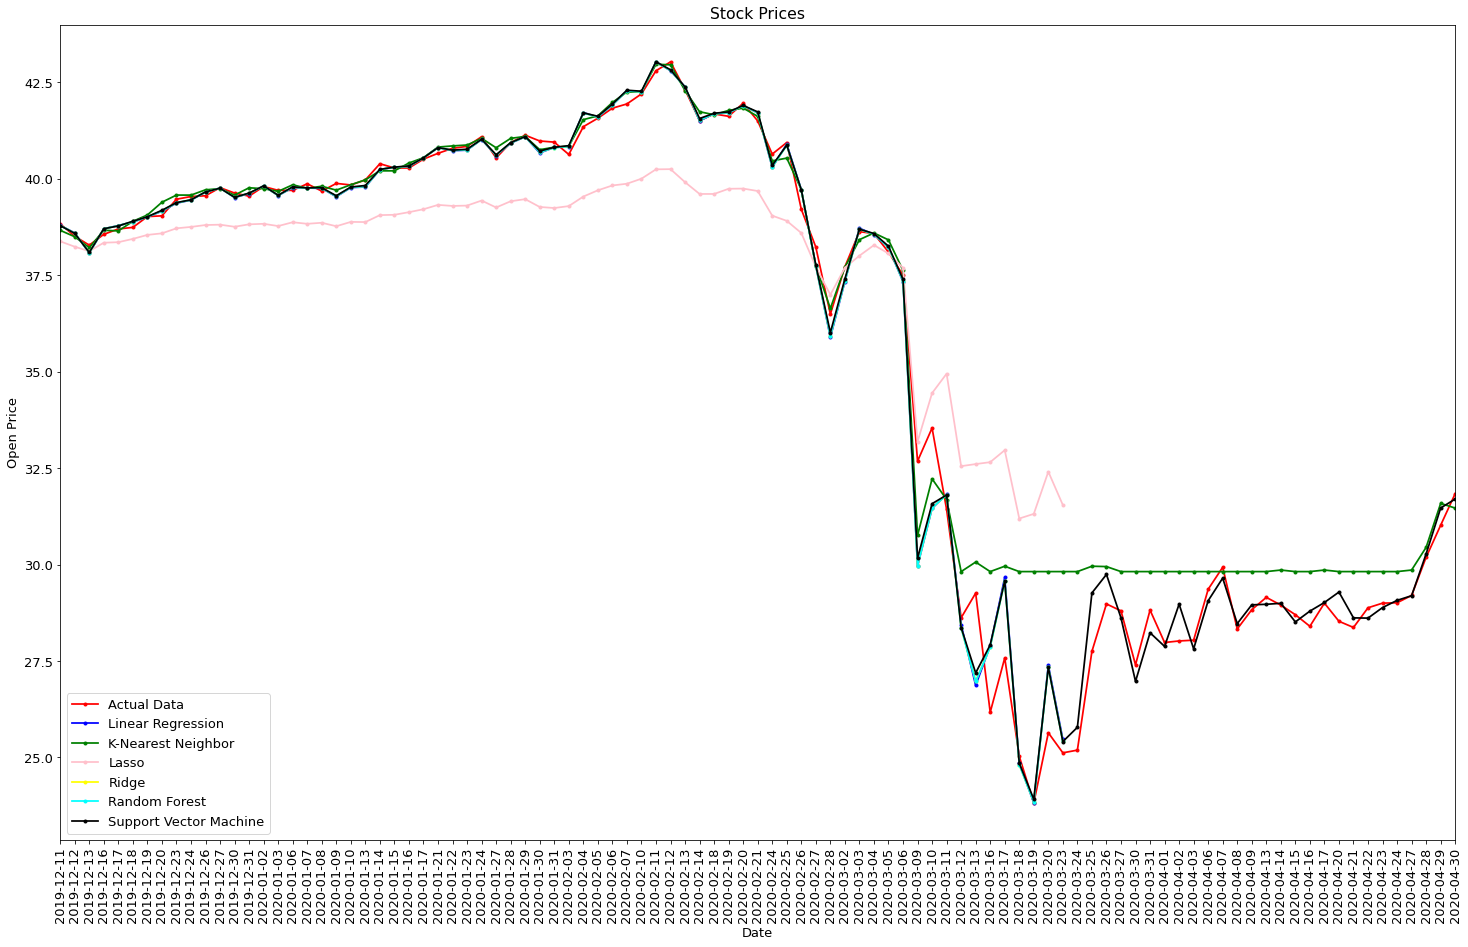

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606, 0.0018728791811405043, 24.769430546845232, 0.21206370668876565, 0.005575342056804733, 0.02243858377339399, 0.12580194584309623]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015, 0.07069309866221501, 20875.23590359247, 5.982144777286913, 10.759084868082155, 1.1347456004178615, 0.6060480381355818]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137, 1.4781068267559903, 35.07868681214803, 35.92465254876913, 70.5240930126532, 7.97067852780275, 4.564744564968054]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049, 0.003021635874409056, 24.771643710397193, 0.21313025399877442, 0.005859557693413025, 0.02177578336689817, 0.12112725955249266]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624, 0.05793075750272759, 20508.497347751647, 5.84214526801505, 10.090853434401394, 0.9233397449841959, 0.439369

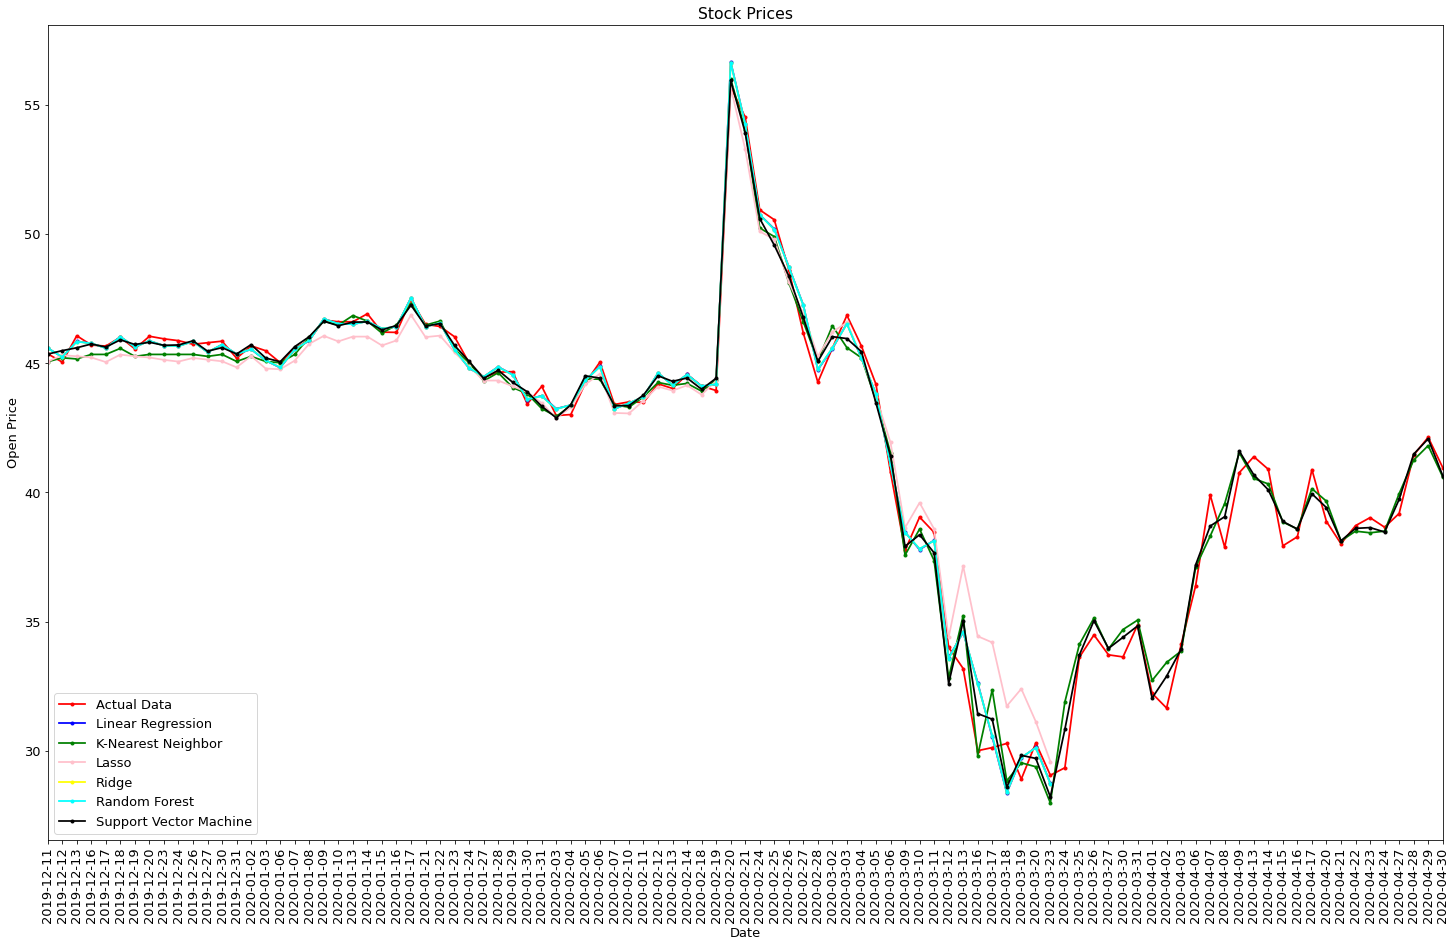

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990755, 0.016520291658930698, 0.12716575236113606, 0.0018728791811405043, 24.769430546845232, 0.21206370668876565, 0.005575342056804733, 0.02243858377339399, 0.12580194584309623, 0.15017966206019726]
KNN MSE:
 [2.8533257360755377, 5.130390976645845, 0.9554228122123015, 0.07069309866221501, 20875.23590359247, 5.982144777286913, 10.759084868082155, 1.1347456004178615, 0.6060480381355818, 0.2976060650103429]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.594870813521137, 1.4781068267559903, 35.07868681214803, 35.92465254876913, 70.5240930126532, 7.97067852780275, 4.564744564968054, 0.6239127198684057]
Ridge MSE:
 [0.42466844159930756, 0.016569574174649715, 0.1256596169868049, 0.003021635874409056, 24.771643710397193, 0.21313025399877442, 0.005859557693413025, 0.02177578336689817, 0.12112725955249266, 0.1499750712015166]
Random Forest MSE:
 [2.3902478927860313, 4.312526554880182, 0.6866595844793624, 0.05793075750272759, 20508

In [15]:
all_df = [df1, df2, df3, df4, df5 ,df6, df7, df8, df9, df10]
LR_MSE = []
KNN_MSE = []
LASSO_MSE = []
RIDGE_MSE = []
RF_MSE = []
SVM_MSE = []

for df in all_df:
    print("STOCK NAME: ", df['Stock name'][0])
    x_train, y_train, x_valid, y_valid, date_train, date_valid = preprocessing(df)

    ## Linear Regression 
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    pred = reg.predict(x_valid)
    lr_mse = mean_squared_error(y_valid, pred)
    LR_MSE.append(lr_mse)
    
    ## Standard Scaler
    data_scaler = StandardScaler()
    s_train = data_scaler.fit_transform(np.asarray(x_train))
    s_valid = data_scaler.transform(np.asarray(x_valid))
    
#     target_scaler = StandardScaler()
#     s_label_train = target_scaler.fit_transform(np.asarray(y_train).reshape(-1,1))
#     s_label_valid = target_scaler.transform(np.asarray(y_valid).reshape(-1,1))
    
    ## KNeighbor Regressor
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(s_train, y_train)
    pred2 = knn.predict(s_valid)
    knn_mse = mean_squared_error(y_valid, pred2)
    KNN_MSE.append(knn_mse)
    print("KNN MSE: ", knn_mse)
    
#     ## KNN vs Linear Regression
#     plt.rcParams.update({'font.size': 13})
#     fig1, ax1 = plt.subplots(figsize = (25,15))
#     ax1.plot(date_valid[230:300], y_valid[230:300], color = 'red', marker='.', linewidth='0.75')
#     ax1.plot(date_valid[230:300], pred[230:300], color = 'blue', marker='.', linewidth='0.75')
#     ax1.plot(date_valid[230:300], pred2[230:300], color = 'green', marker='.', linewidth='0.75')
#     plt.xticks(rotation='90')
#     plt.gca().margins(x=0)
#     plt.legend(['Actual Data', 'Linear Regression', 'K-Nearest Neighbor'], loc='lower left')
#     ax1.set(xlabel="Date", ylabel="Open Price",title="Stock Prices");
#     plt.show()

    ## Lasso
    lasso = Lasso(alpha=10)
    lasso.fit(x_train,y_train)
    pred3 = lasso.predict(x_valid)
    lasso_mse = mean_squared_error(y_valid, pred3)
    LASSO_MSE.append(lasso_mse)

    
    ## Ridge
    ridge = Ridge(alpha=2)
    ridge.fit(x_train,y_train)
    pred4 = ridge.predict(x_valid)
    ridge_mse = mean_squared_error(y_valid, pred4)
    RIDGE_MSE.append(ridge_mse)

    
#     ## Linear Reg vs Lasso vs Ridge
#     plt.rcParams.update({'font.size': 13})
#     fig2, ax2 = plt.subplots(figsize = (25,15))
#     ax2.plot(date_valid[230:300], y_valid[230:300], color = 'red', marker='.', linewidth='0.75')
#     ax2.plot(date_valid[230:300], pred[230:300], color = 'blue', marker='.', linewidth='0.75')
#     ax2.plot(date_valid[230:300], pred3[230:300], color = 'green', marker='.', linewidth='0.75')
#     ax2.plot(date_valid[230:300], pred4[230:300], color = 'yellow', marker='.', linewidth='0.75')
#     plt.xticks(rotation='90')
#     plt.gca().margins(x=0)
#     plt.legend(['Actual Data', 'Simple Linear Regression', 'Lasso Regression', 'Ridge Regression'], loc='lower left')
#     ax2.set(xlabel="Date", ylabel="open Price",title="Stock Prices");
#     plt.show()
    
    ## Random Forest Regressor
    rforest = RandomForestRegressor(n_estimators = 100, random_state = 1) 
    rforest.fit(x_train,y_train)
    pred5 = rforest.predict(x_valid)
    rf_mse = mean_squared_error(y_valid, pred5)
    RF_MSE.append(rf_mse)

    
    ## SVM
    svmm = svm.SVR(gamma='auto', kernel='linear').fit(s_train,y_train)
    pred6 = svmm.predict(s_valid)
    svm_mse = mean_squared_error(y_valid, pred6)
    SVM_MSE.append(svm_mse)

    
    ## SVM vs KNN
    plt.rcParams.update({'font.size': 13})
    fig3, ax3 = plt.subplots(figsize = (25,15))
    ax3.plot(date_valid[230:350], y_valid[230:350], color = 'red', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred[230:300], color = 'blue', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:350], pred2[230:350], color = 'green', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred3[230:300], color = 'pink', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred4[230:300], color = 'yellow', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred4[230:300], color = 'cyan', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:350], pred6[230:350], color = 'black', marker='.', linewidth='1.75')
    plt.xticks(rotation='90')
    plt.gca().margins(x=0)
#     plt.legend(['Actual Data', 'K-Nearest Neighbor', 'Support Vector Machine'], loc='lower left')
    plt.legend(['Actual Data', 'Linear Regression', 'K-Nearest Neighbor', 'Lasso', 'Ridge', 'Random Forest', 'Support Vector Machine'], loc='lower left')
    ax3.set(xlabel="Date", ylabel="Open Price", title="Stock Prices");
    plt.show()
    
    print("Mean Square Error:\n")
    print("Linear Regression MSE:\n", LR_MSE)
    print("KNN MSE:\n", KNN_MSE)
    print("Lasso MSE:\n", LASSO_MSE)
    print("Ridge MSE:\n", RIDGE_MSE)
    print("Random Forest MSE:\n", RF_MSE)
    print("SVM MSE:\n", SVM_MSE)
    print("++++++++++++++++++++END++++++++++++++++++++++++++++++++")
    

In [16]:
LR_MSE

[0.4116863995990755,
 0.016520291658930698,
 0.12716575236113606,
 0.0018728791811405043,
 24.769430546845232,
 0.21206370668876565,
 0.005575342056804733,
 0.02243858377339399,
 0.12580194584309623,
 0.15017966206019726]

In [17]:
import matplotlib.pyplot as plt

Stocks = ['AirCanada', 'Ballard Power Systems', 'Boyd Group Services', 'Trilogy Metals', 'CoStar Group', 'CSG Systems',
          'CSU_Constellation Software', 'DOL_Dollarama', 'ENB_Enbridge', 'ETFC_ETRADE Financial']

In [18]:
Stocks

['AirCanada',
 'Ballard Power Systems',
 'Boyd Group Services',
 'Trilogy Metals',
 'CoStar Group',
 'CSG Systems',
 'CSU_Constellation Software',
 'DOL_Dollarama',
 'ENB_Enbridge',
 'ETFC_ETRADE Financial']

<BarContainer object of 10 artists>

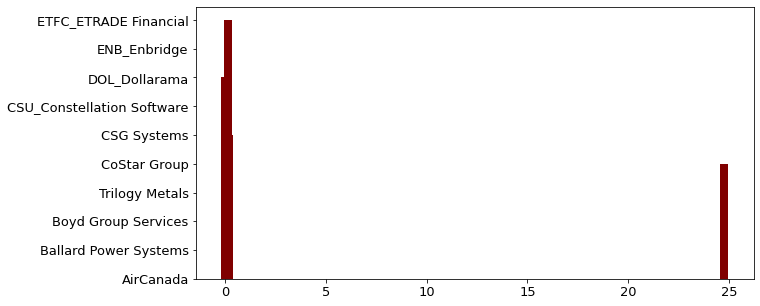

In [19]:
fig = plt.figure(figsize = (10, 5))

plt.bar(LR_MSE, Stocks, color ='maroon',  width = 0.4)

In [20]:
S = pd.DataFrame(Stocks)
S.columns = ['Stocks']
st = S['Stocks']
st

0                     AirCanada
1         Ballard Power Systems
2           Boyd Group Services
3                Trilogy Metals
4                  CoStar Group
5                   CSG Systems
6    CSU_Constellation Software
7                 DOL_Dollarama
8                  ENB_Enbridge
9         ETFC_ETRADE Financial
Name: Stocks, dtype: object

In [21]:
Methods = ['Linear Regression', 'KNN', 'Lasso', 'Ridge', 'Random Forest', 'SVM']

## 1
AC_LR = LR_MSE[0]
AC_MSE = KNN_MSE[0]
AC_Lasso = LASSO_MSE[0]
AC_Ridge = RIDGE_MSE[0]
AC_RF = RF_MSE[0]
AC_svm = SVM_MSE[0]
AC_MSE = [AC_LR, AC_MSE, AC_Lasso, AC_Ridge, AC_RF, AC_svm]
AC_MSE


## 2
LR2 = LR_MSE[1]
KNN2 = KNN_MSE[1]
Lasso2 = LASSO_MSE[1]
Ridge2 = RIDGE_MSE[1]
RF2 = RF_MSE[1]
svm2 = SVM_MSE[1]
MSE2 = [LR2, KNN2, Lasso2, Ridge2, RF2, svm2]

## 3
LR3 = LR_MSE[2]
KNN3 = KNN_MSE[2]
Lasso3 = LASSO_MSE[2]
Ridge3 = RIDGE_MSE[2]
RF3 = RF_MSE[2]
svm3 = SVM_MSE[2]
MSE3 = [LR3, KNN3, Lasso3, Ridge3, RF3, svm3]

##4
LR4 = LR_MSE[8]
KNN4 = KNN_MSE[8]
Lasso4 = LASSO_MSE[8]
Ridge4 = RIDGE_MSE[8]
RF4 = RF_MSE[8]
svm4 = SVM_MSE[8]
MSE4 = [LR4, KNN4, Lasso4, Ridge4, RF4, svm4]

##5
LR5 = LR_MSE[7]
KNN5 = KNN_MSE[7]
Lasso5 = LASSO_MSE[7]
Ridge5 = RIDGE_MSE[7]
RF5 = RF_MSE[7]
svm5 = SVM_MSE[7]
MSE5 = [LR5, KNN5, Lasso5, Ridge5, RF5, svm5]

##6
LR6 = LR_MSE[6]
KNN6 = KNN_MSE[6]
Lasso6 = LASSO_MSE[6]
Ridge6 = RIDGE_MSE[6]
RF6 = RF_MSE[6]
svm6 = SVM_MSE[6]
MSE6 = [LR6, KNN6, Lasso6, Ridge6, RF6, svm6]

In [22]:
AC_MSE

[0.4116863995990755,
 2.8533257360755377,
 15.493929862469383,
 0.42466844159930756,
 2.3902478927860313,
 0.47145577565992564]

In [23]:
M = pd.DataFrame(Methods)
M.columns = ['Method']
M = M['Method']
M

0    Linear Regression
1                  KNN
2                Lasso
3                Ridge
4        Random Forest
5                  SVM
Name: Method, dtype: object

In [24]:
## 1
AC_mse = pd.DataFrame(AC_MSE)
AC_mse.columns = ['Aircanada']
AC_mse = AC_mse['Aircanada']
AC_mse

## 2
mse2 = pd.DataFrame(MSE2)
mse2.columns = ['Ballard Power Systems']
mse2 = mse2['Ballard Power Systems']
mse2

## 3
mse3 = pd.DataFrame(MSE3)
mse3.columns = ['Boyd']
mse3 = mse3['Boyd']
mse3

## 4
mse4 = pd.DataFrame(MSE4)
mse4.columns = ['ENB_Enbridge']
mse4 = mse4['ENB_Enbridge']
mse4

## 5
mse5 = pd.DataFrame(MSE5)
mse5.columns = ['DOL_Dollarama']
mse5 = mse5['DOL_Dollarama']
mse5

## 6
mse6 = pd.DataFrame(MSE6)
mse6.columns = ['CSU_Constellation Software']
mse6 = mse6['CSU_Constellation Software']
mse6

0     0.005575
1    10.759085
2    70.524093
3     0.005860
4    10.090853
5     0.006185
Name: CSU_Constellation Software, dtype: float64

In [25]:
mse6.name

'CSU_Constellation Software'

Stock Name:  Aircanada


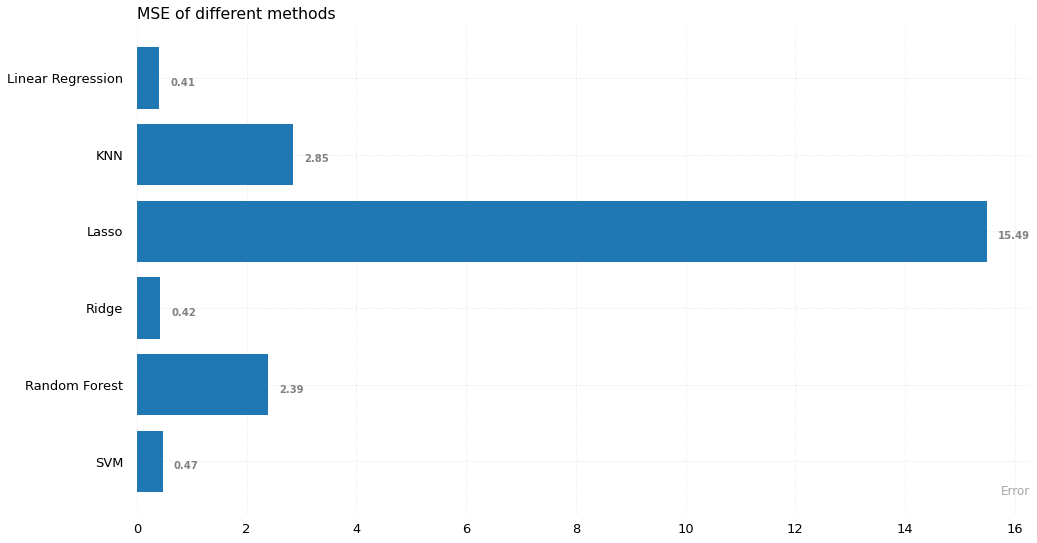

Stock Name:  Ballard Power Systems


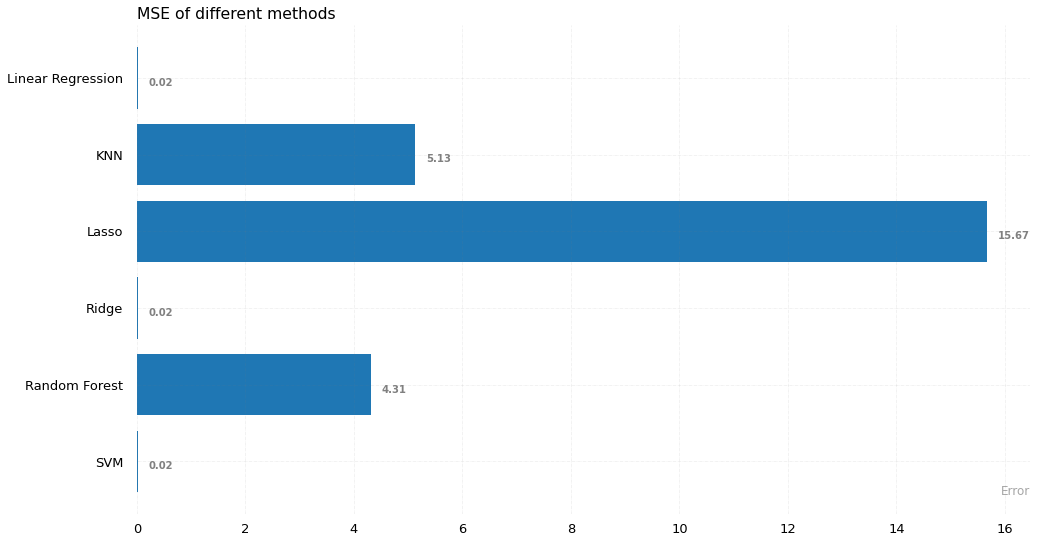

Stock Name:  Boyd


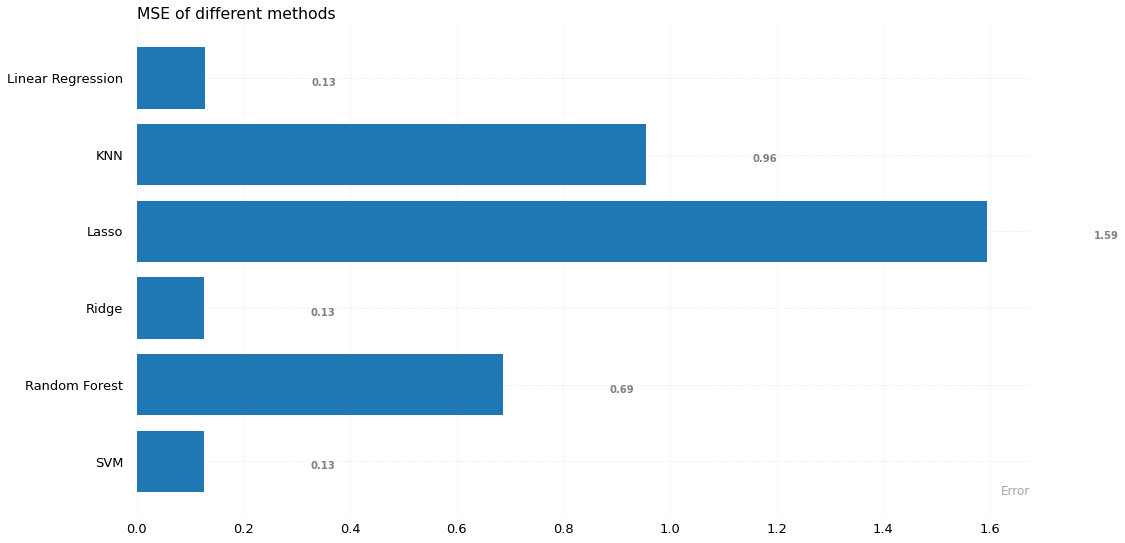

Stock Name:  ENB_Enbridge


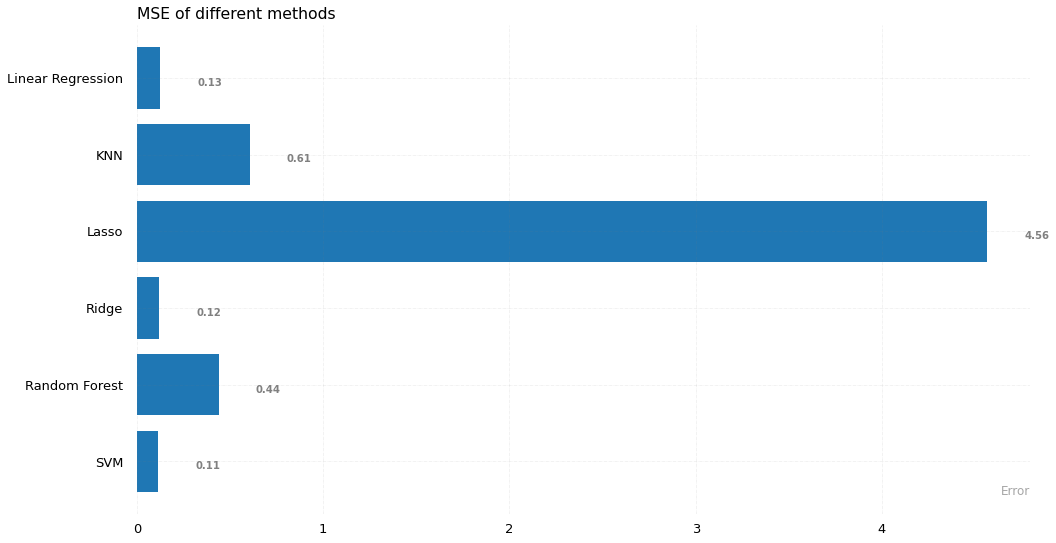

Stock Name:  DOL_Dollarama


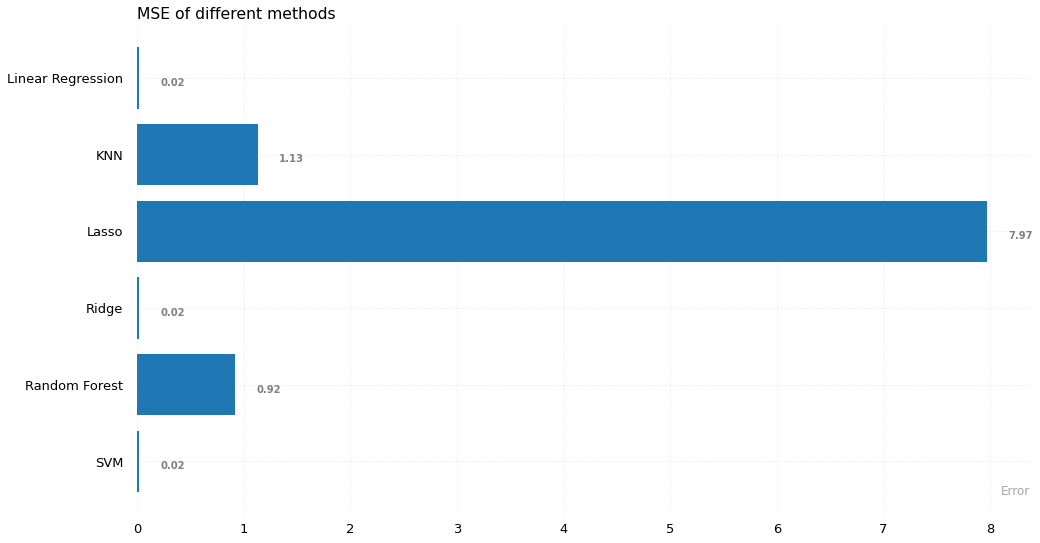

Stock Name:  CSU_Constellation Software


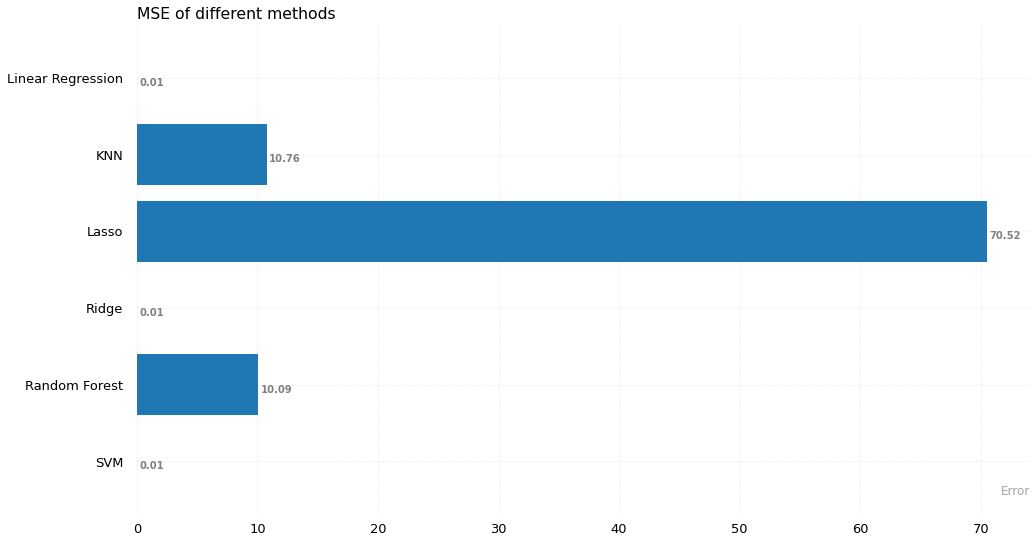

In [26]:
mse = [AC_mse, mse2, mse3, mse4, mse5, mse6]

for i in mse:
    
    print("Stock Name: ", i.name)
    fig, ax = plt.subplots(figsize =(16, 9))

    ax.barh(M, i)

    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10) 

    # Add x, y gridlines 
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

    # Show top values  
    ax.invert_yaxis()

    # Add annotation to bars 
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')

    # Add Plot Title 
    ax.set_title('MSE of different methods', loc ='left', )

    # Add Text watermark 
    fig.text(0.9, 0.15, 'Error', fontsize = 12, 
             color ='grey', ha ='right', va ='bottom', 
             alpha = 0.7)
    
    
    # Show Plot 
    plt.show()

In [27]:
LR = pd.DataFrame(LR_MSE)
LR.columns = ['MSE']
LR_df = LR['MSE']
LR_df

KNN = pd.DataFrame(KNN_MSE)
KNN.columns = ['MSE']
KNN_df = KNN['MSE']
KNN_df

Lasso = pd.DataFrame(LASSO_MSE)
Lasso.columns = ['MSE']
Lasso_df = Lasso['MSE']
Lasso_df

Ridge = pd.DataFrame(RIDGE_MSE)
Ridge.columns = ['MSE']
Ridge_df = Ridge['MSE']
Ridge_df

RF = pd.DataFrame(RF_MSE)
RF.columns = ['MSE']
RF_df = RF['MSE']
RF_df

svm = pd.DataFrame(SVM_MSE)
svm.columns = ['MSE']
svm_df = svm['MSE']
svm_df

0     0.471456
1     0.015224
2     0.126657
3     0.002921
4    45.733107
5     0.218507
6     0.006185
7     0.021847
8     0.114550
9     0.197884
Name: MSE, dtype: float64

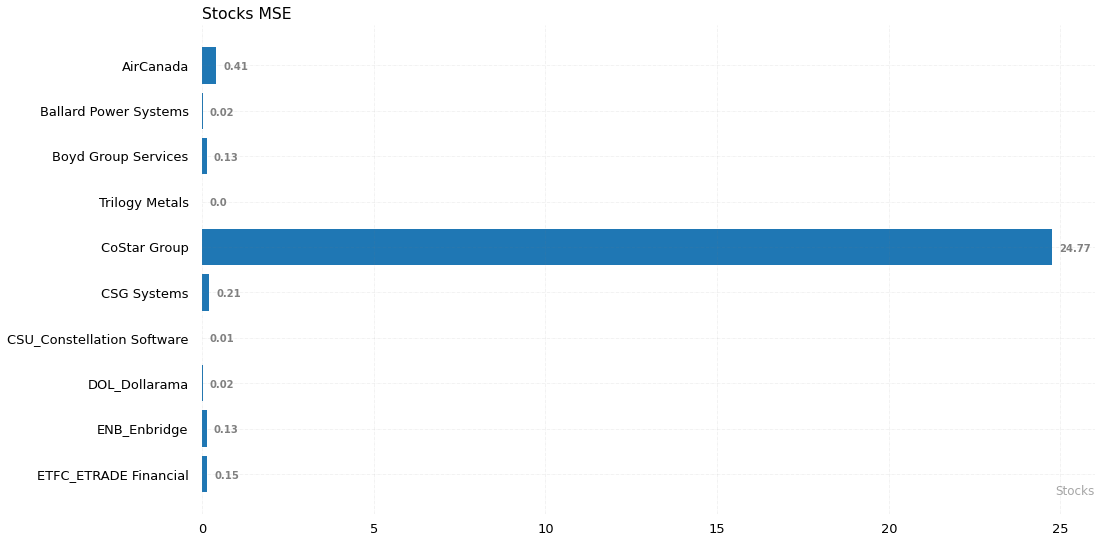

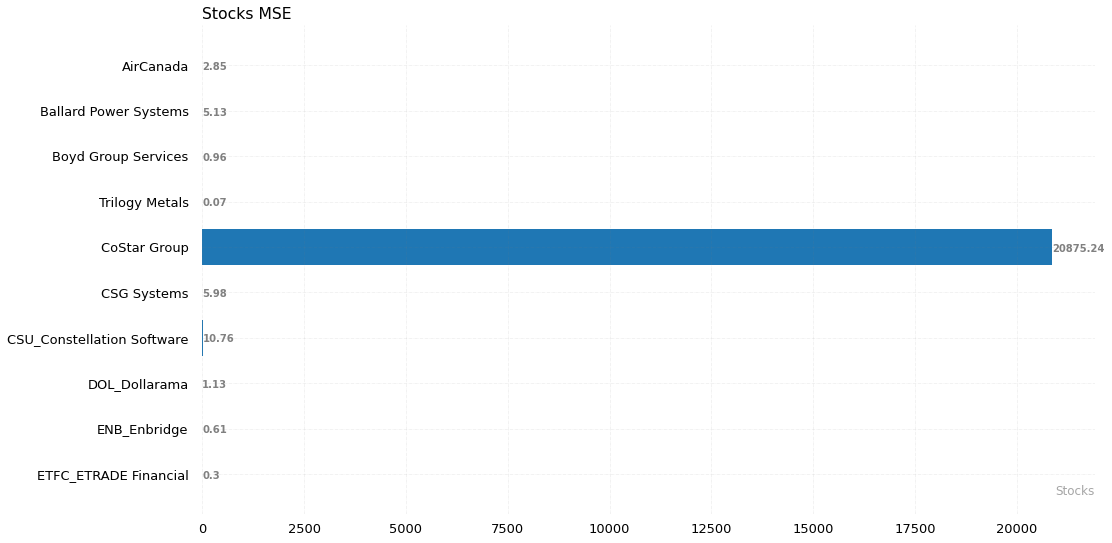

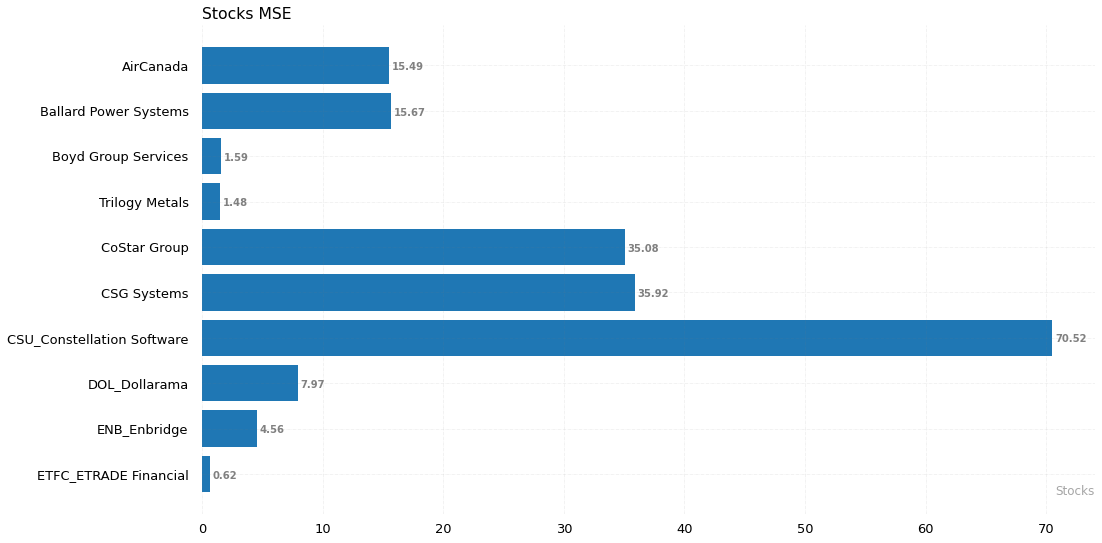

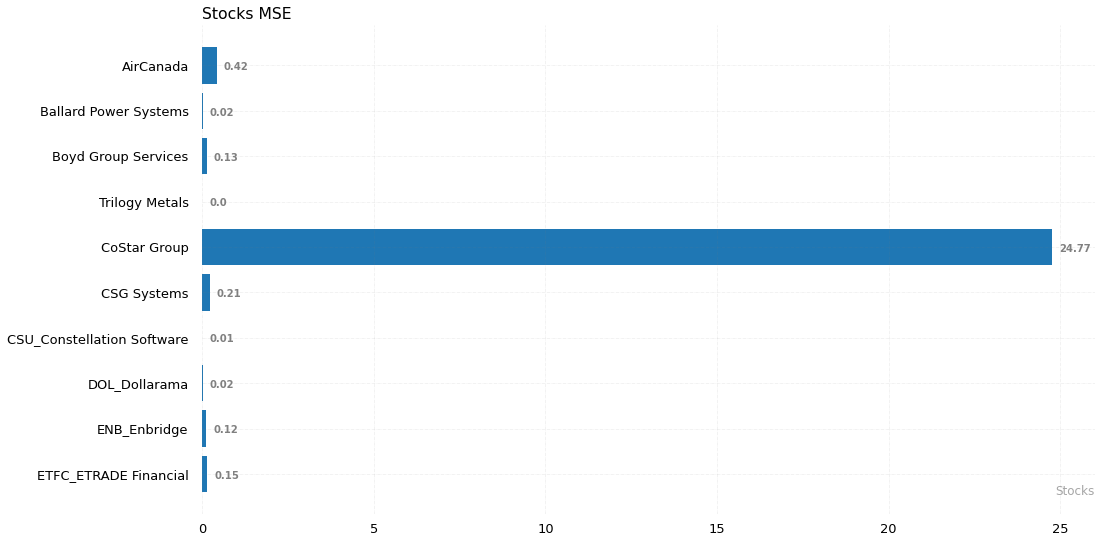

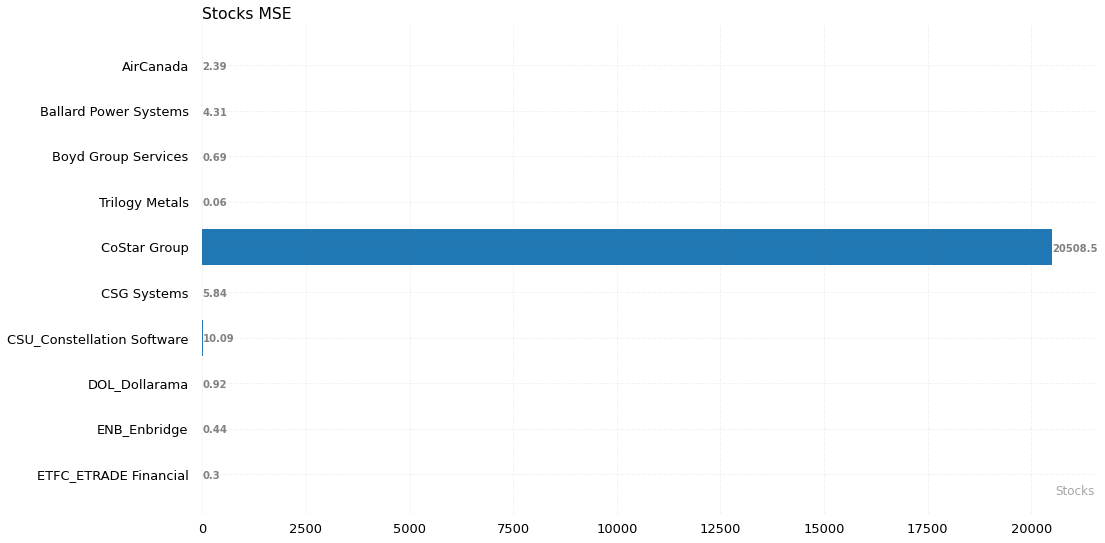

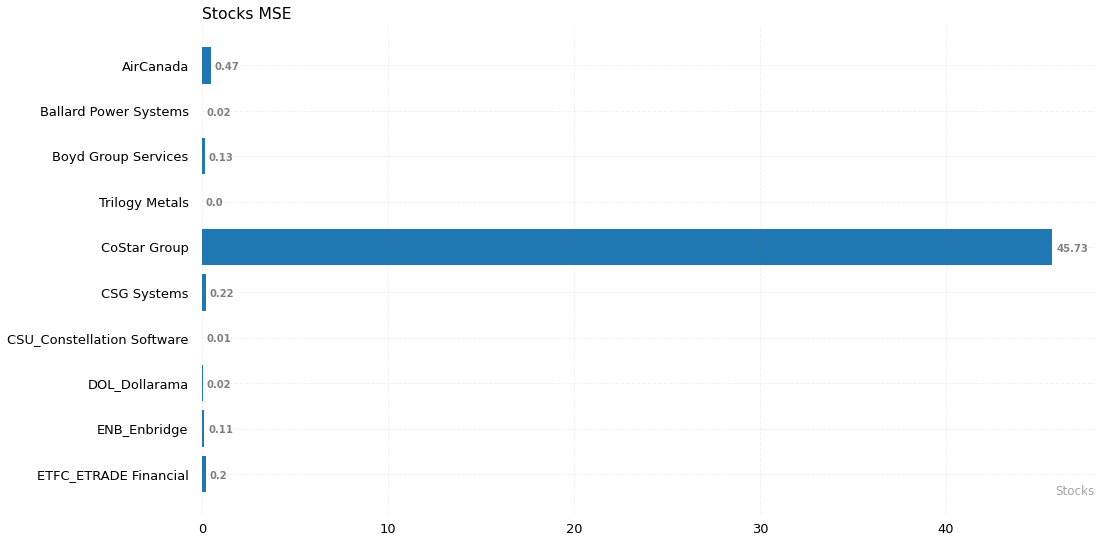

In [28]:
df = [LR_df, KNN_df, Lasso_df, Ridge_df, RF_df, svm_df]

for i in df:
    fig, ax = plt.subplots(figsize =(16, 9))

    ax.barh(st, i)

    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10) 

    # Add x, y gridlines 
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

    # Show top values  
    ax.invert_yaxis()

    # Add annotation to bars 
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')

    # Add Plot Title 
    ax.set_title('Stocks MSE', loc ='left', )

    # Add Text watermark 
    fig.text(0.9, 0.15, 'Stocks', fontsize = 12, 
             color ='grey', ha ='right', va ='bottom', 
             alpha = 0.7)

    # Show Plot 
    plt.show()